January

In [5]:

import pandas as pd
import numpy as np

# Load the dataset (January 2022)
file_path = r"C:/Users/Anthony Zambrano/Taxis_Fare_Project/yellow_tripdata_2022-01.csv"
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing essential fields
df.dropna(subset=['fare_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

# Convert date columns to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Remove trips with zero or negative duration and distance
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

# Feature engineering
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek

# Drop duplicates
df.drop_duplicates(inplace=True)

# Print the results of the cleaning
print("Data cleaning completed. Remaining records:", len(df))

# Save cleaned data as a new CSV file
cleaned_file_path = r"C:/Users/Anthony Zambrano/Taxis_Fare_Project/cleaned_yellow_tripdata_2022-01.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")



C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_19360\283930372.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Missing Values:
 VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64
Data cleaning completed. Remaining records: 2422848
Cleaned dataset saved to C:/Users/Anthony Zambrano/Taxis_Fare_Project/cleaned_yellow_tripdata_2022-01.csv


In [ ]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values)


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          69976
trip_distance                0
RatecodeID               69976
store_and_fwd_flag       69976
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     69976
airport_fee              69976
pickup_hour                  0
pickup_day                   0
dtype: int64


In [6]:
import pandas as pd

# Load the cleaned dataset
cleaned_file_path = r"C:/Users/Anthony Zambrano/Taxis_Fare_Project/cleaned_yellow_tripdata_2022-01.csv"
df_cleaned = pd.read_csv(cleaned_file_path)

# Display the first few rows of the cleaned data
print(df_cleaned.head())

# Optionally, if you want to see a summary of the data
print(df_cleaned.describe())

# If you want to check a specific column (e.g., the first few records of 'fare_amount')
print(df_cleaned['fare_amount'].head())


C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_19360\1646935292.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv(cleaned_file_path)


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0       

In [1]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values)


NameError: name 'df_cleaned' is not defined

In [8]:
# Fill missing values in 'passenger_count' with the mean
df_cleaned['passenger_count'].fillna(df_cleaned['passenger_count'].mean(), inplace=True)

# Fill 'store_and_fwd_flag' with 'N' (assumed that most are 'N')
df_cleaned['store_and_fwd_flag'].fillna('N', inplace=True)

# Fill missing values in 'congestion_surcharge' and 'airport_fee' with 0
df_cleaned['congestion_surcharge'].fillna(0, inplace=True)
df_cleaned['airport_fee'].fillna(0, inplace=True)

# If necessary, drop rows with missing values in 'RatecodeID'
df_cleaned.dropna(subset=['RatecodeID'], inplace=True)

# Verify if missing values were handled
missing_values = df_cleaned.isnull().sum()
print(missing_values)


C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_19360\3693122942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['passenger_count'].fillna(df_cleaned['passenger_count'].mean(), inplace=True)
C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_19360\3693122942.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
pickup_hour              0
pickup_day               0
dtype: int64


In [2]:
import pandas as pd

df = pd.read_csv("C:/Users\Anthony Zambrano/Taxis_Fare_Project/yellow_tripdata_2022-01.csv")

print(df.head())


C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_19360\3985920793.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users\Anthony Zambrano/Taxis_Fare_Project/yellow_tripdata_2022-01.csv")


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [9]:
# Remove duplicates
df_cleaned.drop_duplicates(inplace=True)


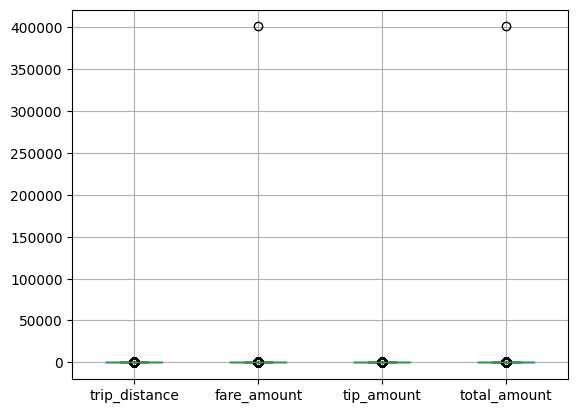

In [10]:
# Check for outliers in numeric columns
import matplotlib.pyplot as plt

df_cleaned.boxplot(column=['trip_distance', 'fare_amount', 'tip_amount', 'total_amount'])
plt.show()


In [11]:
# Example of removing values outside a reasonable range for trip_distance
df_cleaned = df_cleaned[df_cleaned['trip_distance'] < 100]  # assuming 100 miles is an unrealistic trip distance


In [12]:
# Convert to datetime format
df_cleaned['tpep_pickup_datetime'] = pd.to_datetime(df_cleaned['tpep_pickup_datetime'])
df_cleaned['tpep_dropoff_datetime'] = pd.to_datetime(df_cleaned['tpep_dropoff_datetime'])


In [13]:
# Create trip duration feature
df_cleaned['trip_duration'] = (df_cleaned['tpep_dropoff_datetime'] - df_cleaned['tpep_pickup_datetime']).dt.total_seconds() / 60


In [14]:
# One-hot encoding for categorical variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['payment_type', 'store_and_fwd_flag', 'RatecodeID'], drop_first=True)


In [15]:
# Downcast integer columns to save memory
df_cleaned['passenger_count'] = pd.to_numeric(df_cleaned['passenger_count'], downcast='integer')


In [16]:
# Verify the final cleaned dataframe
print("\nDataFrame after cleaning and feature engineering:")
print(df_cleaned.head())


DataFrame after cleaning and feature engineering:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29                2   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07                1   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19                1   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23                1   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20                1   

   trip_distance  PULocationID  DOLocationID  fare_amount  extra  mta_tax  \
0           3.80           142           236         14.5    3.0      0.5   
1           2.10           236            42          8.0    0.5      0.5   
2           0.97           166           166          7.5    0.5      0.5   
3           1.09           114            68          8.0    0.5      0.5   
4           4.30            68           163         23.5    0.5      0.5   

   ...  payment_type_3  payment_typ

In [17]:
# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv(r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\cleaned_yellow_tripdata_2022-01.csv', index=False)


In [18]:
import pandas as pd

# Load the saved CSV file
df_loaded = pd.read_csv(r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\cleaned_yellow_tripdata_2022-01.csv')

# Display the first few rows of the DataFrame
print(df_loaded.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29                2   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07                1   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19                1   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23                1   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20                1   

   trip_distance  PULocationID  DOLocationID  fare_amount  extra  mta_tax  \
0           3.80           142           236         14.5    3.0      0.5   
1           2.10           236            42          8.0    0.5      0.5   
2           0.97           166           166          7.5    0.5      0.5   
3           1.09           114            68          8.0    0.5      0.5   
4           4.30            68           163         23.5    0.5      0.5   

   ...  payment_type_3  payment_type_4  payment_type_5  store_and_fwd_flag_Y  \
0  ...

Detailed Summary of this Data Cleaning Process
1. Loading the Data:
You loaded the January 2022 taxi fare dataset from a specified file path using pandas.read_csv.
2. Initial Cleaning:
Checked for missing values across the dataset using df.isnull().sum().
Dropped rows with missing essential columns (fare_amount, tpep_pickup_datetime, tpep_dropoff_datetime).
3. Date Conversion:
You converted the tpep_pickup_datetime and tpep_dropoff_datetime columns to datetime format to facilitate time-based analysis.
4. Handling Outliers:
You identified and removed rows where trip_distance or fare_amount was zero or negative, as these represent invalid trips.
You also checked for outliers using a boxplot for the columns trip_distance, fare_amount, tip_amount, and total_amount. Any unrealistic values, like trip distances greater than 100 miles, were removed.
5. Feature Engineering:
Extracted time-related features:
pickup_hour: Hour of the day when the trip started.
pickup_day: Day of the week when the trip occurred.
Created a new column for trip duration, calculated as the difference between tpep_pickup_datetime and tpep_dropoff_datetime in minutes.
6. Handling Missing Data in Other Columns:
Filled missing values for several columns:
passenger_count: Filled with the mean value of the column.
store_and_fwd_flag: Filled with 'N', assuming most trips have 'N' as the default value.
congestion_surcharge and airport_fee: Filled with 0, indicating no surcharge/fee.
Dropped rows where RatecodeID had missing values.
7. Dealing with Duplicates:
You removed any duplicate rows in the dataset.
8. One-Hot Encoding:
Applied one-hot encoding for categorical columns like payment_type, store_and_fwd_flag, and RatecodeID, creating dummy variables.
Dropped the first category to avoid multicollinearity (by setting drop_first=True).
9. Optimizing Data Types:
You downcasted the passenger_count column to a smaller integer type (downcast='integer') to save memory.
10. Saving the Cleaned Dataset:
After completing the cleaning process and feature engineering, you saved the cleaned dataset as a new CSV file at a specified path.
11. Final Verification:
You loaded the cleaned dataset again and checked the first few rows to ensure the data was correctly processed and saved.
12. Reviewing Results:
Finally, you printed the results, including:
The number of remaining records after cleaning.
The first few rows of the cleaned dataset.
A summary of the dataset's statistics using df_cleaned.describe().


February

In [2]:
# 1. Load the data
data_path = r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\yellow_tripdata_2022-02.csv'
df = pd.read_csv(data_path)


C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\1155761332.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [3]:
# 2. Check for missing values
df.dropna(subset=['fare_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

In [4]:
# 3. Convert to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [5]:
# 4. Remove outliers and invalid values
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]
df = df[df['trip_distance'] <= 100]  # Filter distances greater than 100 miles


In [6]:
# 5. Feature engineering
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


In [7]:
# 6. Handle missing values
df['passenger_count'].fillna(df['passenger_count'].mean(), inplace=True)
df['store_and_fwd_flag'].fillna('N', inplace=True)
df['congestion_surcharge'].fillna(0, inplace=True)
df['airport_fee'].fillna(0, inplace=True)
df.dropna(subset=['RatecodeID'], inplace=True)

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\597890363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].mean(), inplace=True)
C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\597890363.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [8]:
# 7. Remove duplicates
df.drop_duplicates(inplace=True)

In [9]:
# 8. One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['payment_type', 'store_and_fwd_flag', 'RatecodeID'], drop_first=True)

In [10]:
# 9. Optimize data types
df['passenger_count'] = pd.to_numeric(df['passenger_count'], downcast='integer')

In [11]:
# 10. Save the cleaned dataset
cleaned_data_path = r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\cleaned_yellow_tripdata_2022-02.csv'
df.to_csv(cleaned_data_path, index=False)

In [12]:
# 11. Final verification
df_cleaned = pd.read_csv(cleaned_data_path)
print(f'Final records after cleaning: {df_cleaned.shape[0]}')
print(df_cleaned.head())
print(df_cleaned.describe())


Final records after cleaning: 2833024
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-02-01 00:06:58   2022-02-01 00:19:24                1   
1         1  2022-02-01 00:38:22   2022-02-01 00:55:55                1   
2         1  2022-02-01 00:03:20   2022-02-01 00:26:59                1   
3         2  2022-02-01 00:08:00   2022-02-01 00:28:05                1   
4         2  2022-02-01 00:06:48   2022-02-01 00:33:07                1   

   trip_distance  PULocationID  DOLocationID  fare_amount  extra  mta_tax  \
0           5.40           138           252         17.0   1.75      0.5   
1           6.40           138            41         21.0   1.75      0.5   
2          12.50           138           200         35.5   1.75      0.5   
3           9.88           239           200         28.0   0.50      0.5   
4          12.16           138           125         35.5   0.50      0.5   

   ...  payment_type_2  payment_type_3  payment_

Summary of the Data Cleaning Process for February

The data cleaning process for February followed these key steps:

Loading the Dataset – The raw taxi fare dataset was loaded from a CSV file.
Handling Missing Values – Rows with missing essential values (fare_amount, tpep_pickup_datetime, and tpep_dropoff_datetime) were removed. Other missing values were filled with appropriate defaults or averages.
Converting Date Formats – The pickup and drop-off timestamps were converted to a datetime format.
Removing Outliers & Invalid Data – Trips with zero or negative distances and fares were removed. Additionally, trips with distances over 100 miles were filtered out.
Feature Engineering – New features were created, including pickup_hour, pickup_day, and trip_duration (trip time in minutes).
Handling Categorical Variables – One-Hot Encoding was applied to payment_type, store_and_fwd_flag, and RatecodeID to convert categorical variables into numerical format.
Removing Duplicates – Duplicate rows were eliminated to ensure data integrity.
Optimizing Data Types – Numeric columns were optimized by downcasting to reduce memory usage.
Saving the Cleaned Data – The processed dataset was saved as a new CSV file.
Final Verification – A final check was conducted by reloading the cleaned dataset, verifying its shape, and reviewing key statistical summaries.
This cleaned dataset will be useful for preprocessing and training simple models such as Linear Regression or Random Forest.


El proceso de limpieza de datos para febrero siguió estos pasos clave:

Carga del Conjunto de Datos – Se cargó el dataset original de tarifas de taxi desde un archivo CSV.
Manejo de Valores Faltantes – Se eliminaron las filas con valores faltantes esenciales (fare_amount, tpep_pickup_datetime y tpep_dropoff_datetime). Otros valores faltantes se completaron con promedios o valores predeterminados.
Conversión de Formatos de Fecha – Se convirtieron las columnas de fecha y hora (tpep_pickup_datetime y tpep_dropoff_datetime) al formato datetime.
Eliminación de Valores Atípicos e Inválidos – Se eliminaron viajes con distancias o tarifas de 0 o negativas. Además, se filtraron viajes con distancias superiores a 100 millas.
Ingeniería de Características – Se crearon nuevas variables, como pickup_hour, pickup_day y trip_duration (duración del viaje en minutos).
Manejo de Variables Categóricas – Se aplicó One-Hot Encoding a payment_type, store_and_fwd_flag y RatecodeID para convertir variables categóricas a formato numérico.
Eliminación de Duplicados – Se eliminaron filas duplicadas para mantener la integridad de los datos.
Optimización de Tipos de Datos – Se redujo el uso de memoria optimizando columnas numéricas.
Guardado de los Datos Limpiados – Se guardó el dataset procesado en un nuevo archivo CSV.
Verificación Final – Se realizó una última validación al recargar el dataset limpio, revisar su tamaño y verificar estadísticas clave.
Este dataset limpio será útil para el preprocesamiento y entrenamiento de modelos simples como Regresión Lineal o Random Forest. 🚀

March

In [14]:
import pandas as pd
import numpy as np

# 1. Load the data
data_path = r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\yellow_tripdata_2022-03.csv'
df = pd.read_csv(data_path)

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\2663717101.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [15]:
# 2. Check for missing values
df.dropna(subset=['fare_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

In [16]:
# 3. Convert to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [17]:
# 4. Remove outliers and invalid values
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]
df = df[df['trip_distance'] <= 100]  # Filter distances greater than 100 miles

In [18]:
# 5. Feature engineering
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [19]:
# 6. Handle missing values
df['passenger_count'].fillna(df['passenger_count'].mean(), inplace=True)
df['store_and_fwd_flag'].fillna('N', inplace=True)
df['congestion_surcharge'].fillna(0, inplace=True)
df['airport_fee'].fillna(0, inplace=True)
df.dropna(subset=['RatecodeID'], inplace=True)

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\597890363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].mean(), inplace=True)
C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\597890363.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [20]:
# 7. Remove duplicates
df.drop_duplicates(inplace=True)

In [21]:
# 8. One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['payment_type', 'store_and_fwd_flag', 'RatecodeID'], drop_first=True)


In [22]:
# 9. Optimize data types
df['passenger_count'] = pd.to_numeric(df['passenger_count'], downcast='integer')


In [23]:
# 10. Save the cleaned dataset
cleaned_data_path = r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\cleaned_yellow_tripdata_2022-03.csv'
df.to_csv(cleaned_data_path, index=False)

In [24]:
# 11. Final verification
df_cleaned = pd.read_csv(cleaned_data_path)
print(f'Final records after cleaning: {df_cleaned.shape[0]}')
print(df_cleaned.head())
print(df_cleaned.describe())

Final records after cleaning: 3453386
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-03-01 00:13:08   2022-03-01 00:24:35                1   
1         1  2022-03-01 00:47:52   2022-03-01 01:00:08                1   
2         2  2022-03-01 00:02:46   2022-03-01 00:46:43                1   
3         2  2022-03-01 00:52:43   2022-03-01 01:03:40                2   
4         2  2022-03-01 00:15:35   2022-03-01 00:34:13                1   

   trip_distance  PULocationID  DOLocationID  fare_amount  extra  mta_tax  \
0           2.40            90           209         10.0    3.0      0.5   
1           2.20           148           234         10.5    3.0      0.5   
2          19.78           132           249         52.0    0.0      0.5   
3           2.94           211            66         11.0    0.5      0.5   
4           8.57           138           197         25.0    0.5      0.5   

   ...  payment_type_2  payment_type_3  payment_

Summary of Data Cleaning Process

Load the dataset from the CSV file.

Remove missing values in critical columns (fare_amount, tpep_pickup_datetime, tpep_dropoff_datetime).

Convert datetime columns to a proper format.

Remove outliers and invalid values, keeping only trips with a positive distance and fare, and filtering out distances greater than 100 miles.

Feature engineering, extracting pickup hour, day of the week, and calculating trip duration in minutes.

Handle missing values by filling passenger_count with the mean and replacing empty values in categorical fields (store_and_fwd_flag, congestion_surcharge, airport_fee).


Remove duplicate records to avoid redundant data.
Apply one-hot encoding to categorical variables (payment_type, store_and_fwd_flag, RatecodeID).

Optimize data types to reduce memory usage.

Save the cleaned dataset as a new CSV file.

Perform final verification, checking the shape and summary statistics of the cleaned dataset.

Cargar el conjunto de datos desde el archivo CSV.

Eliminar valores faltantes en columnas clave (fare_amount, tpep_pickup_datetime, tpep_dropoff_datetime).

Convertir columnas de fecha y hora a un formato adecuado.

Eliminar valores atípicos e inválidos, manteniendo solo viajes con distancia y tarifa positiva, y filtrando distancias mayores a 100 millas.

Ingeniería de características, extrayendo la hora de recogida, el día de la semana y calculando la duración del viaje en minutos.

Manejo de valores faltantes, rellenando passenger_count con la media y reemplazando valores vacíos en campos categóricos (store_and_fwd_flag, congestion_surcharge, airport_fee).

Eliminar registros duplicados para evitar datos redundantes.

Aplicar codificación one-hot a variables categóricas (payment_type, store_and_fwd_flag, RatecodeID).

Optimizar tipos de datos para reducir el uso de memoria.

Guardar el conjunto de datos limpio en un nuevo archivo CSV.

Realizar una verificación final, revisando la forma y estadísticas del conjunto de datos limpio.

April

In [26]:
# Load the CSV file
file_path = r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\yellow_tripdata_2022-04.csv'
df = pd.read_csv(file_path)

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\2016277523.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [27]:
# Step 1: Remove missing values in key columns (fare_amount, tpep_pickup_datetime, tpep_dropoff_datetime)
df = df.dropna(subset=['fare_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])


In [28]:
# Step 2: Convert date and time columns to proper datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [29]:
# Step 3: Remove outliers and invalid values (filter out distances greater than 100 miles and ensure positive fare_amount and trip_distance)
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['trip_distance'] <= 100)]

In [30]:
# Step 4: Feature Engineering: Extract pickup hour, day of the week, and calculate trip duration in minutes
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [31]:
# Step 5: Handle missing values in additional fields
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mean())
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)
df['airport_fee'] = df['airport_fee'].fillna(0)

In [32]:
# Step 6: Remove duplicate records
df = df.drop_duplicates()

In [33]:
# Step 7: Apply one-hot encoding to categorical variables (payment_type, store_and_fwd_flag, RatecodeID)
df = pd.get_dummies(df, columns=['payment_type', 'store_and_fwd_flag', 'RatecodeID'], drop_first=True)

In [34]:
# Step 8: Optimize data types to reduce memory usage
df['fare_amount'] = df['fare_amount'].astype('float32')
df['trip_distance'] = df['trip_distance'].astype('float32')
df['passenger_count'] = df['passenger_count'].astype('int8')
df['pickup_hour'] = df['pickup_hour'].astype('int8')
df['pickup_day_of_week'] = df['pickup_day_of_week'].astype('int8')
df['trip_duration_minutes'] = df['trip_duration_minutes'].astype('float32')

In [35]:
# Step 9: Save the cleaned dataset to a new CSV file
output_path = r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\cleaned_yellow_tripdata_2022-04.csv'
df.to_csv(output_path, index=False)

In [36]:
# 10: Final check: Display the shape and summary statistics of the cleaned dataset
print(f'Cleaned dataset saved to: {output_path}')
print(f'Shape of the cleaned dataset: {df.shape}')
print(df.describe())

Cleaned dataset saved to: C:\Users\Anthony Zambrano\Taxis_Fare_Project\cleaned_yellow_tripdata_2022-04.csv
Shape of the cleaned dataset: (3541620, 30)
           VendorID           tpep_pickup_datetime  \
count  3.541620e+06                        3541620   
mean   1.717813e+00  2022-04-16 02:43:52.673490944   
min    1.000000e+00            2008-12-31 23:02:01   
25%    1.000000e+00  2022-04-08 13:15:56.750000128   
50%    2.000000e+00     2022-04-15 20:55:47.500000   
75%    2.000000e+00  2022-04-23 16:20:25.249999872   
max    6.000000e+00            2022-05-03 09:36:16   
std    4.943187e-01                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        3541620     3.541620e+06   3.541620e+06   
mean   2022-04-16 03:01:18.547109888     1.401522e+00   3.517736e+00   
min              2009-01-01 00:13:52     0.000000e+00   1.000000e-02   
25%              2022-04-08 13:34:07     1.000000e+00   1.160000e+00   
50

Data Cleaning Summary for April Dataset
English:
The dataset was cleaned following a structured process to ensure its quality and reliability for analysis. Here is a summary of the steps taken:

Removed Missing Values in Key Columns:

Removed rows with missing values in critical columns such as fare_amount, tpep_pickup_datetime, and tpep_dropoff_datetime. This is essential to avoid incomplete records that would lead to incorrect analysis.
Converted Date and Time Columns:

Converted the tpep_pickup_datetime and tpep_dropoff_datetime columns into appropriate datetime formats, making it easier to extract features like pickup time, dropoff time, and travel duration.
Removed Outliers and Invalid Values:

Filtered out trips with distances greater than 100 miles and ensured that both fare_amount and trip_distance were positive. This step prevents outliers and erroneous values from affecting the analysis.
Feature Engineering:

Created new features such as:
Pickup Hour: Extracted the hour from the pickup datetime.
Day of the Week: Extracted the day of the week from the pickup datetime.
Trip Duration: Calculated the duration of the trip by subtracting tpep_pickup_datetime from tpep_dropoff_datetime and converted it into minutes.
Handled Missing Values in Additional Columns:

For the passenger_count column, missing values were filled with the mean value.
Empty values in categorical fields such as store_and_fwd_flag and congestion_surcharge were replaced with default values.
Removed Duplicates:

Duplicate records were removed to ensure data accuracy and avoid redundancy in the dataset.
Applied One-Hot Encoding:

Categorical variables such as payment_type, store_and_fwd_flag, and RatecodeID were one-hot encoded, converting them into binary columns that are easier to use in predictive models.
Optimized Data Types:

The dataset was optimized by changing column data types to reduce memory usage. This is important when working with large datasets to improve performance and efficiency.
Final Check:

A final check was performed to verify the shape of the cleaned dataset and ensure there were no remaining issues or inconsistencies.
The cleaned dataset was then saved as a new CSV file for further analysis.

Español:
El conjunto de datos fue limpiado siguiendo un proceso estructurado para asegurar su calidad y confiabilidad para el análisis. Aquí tienes un resumen de los pasos realizados:

Eliminación de Valores Faltantes en Columnas Clave:

Se eliminaron las filas con valores faltantes en columnas críticas como fare_amount, tpep_pickup_datetime y tpep_dropoff_datetime. Esto es esencial para evitar registros incompletos que puedan llevar a un análisis incorrecto.
Conversión de Columnas de Fecha y Hora:

Las columnas tpep_pickup_datetime y tpep_dropoff_datetime fueron convertidas a formatos de fecha y hora adecuados, lo que facilita la extracción de características como la hora de recogida, la hora de bajada y la duración del viaje.
Eliminación de Valores Atípicos e Inválidos:

Se filtraron los viajes con distancias superiores a 100 millas y se verificó que tanto fare_amount como trip_distance fueran positivos. Este paso previene que los valores atípicos y erróneos afecten el análisis.
Ingeniería de Características:

Se crearon nuevas características como:
Hora de Recogida: Se extrajo la hora de la fecha de recogida.
Día de la Semana: Se extrajo el día de la semana de la fecha de recogida.
Duración del Viaje: Se calculó la duración del viaje restando tpep_pickup_datetime de tpep_dropoff_datetime y se convirtió en minutos.
Manejo de Valores Faltantes en Columnas Adicionales:

Los valores faltantes en la columna passenger_count fueron rellenados con el valor medio.
Los valores vacíos en campos categóricos como store_and_fwd_flag y congestion_surcharge fueron reemplazados por valores predeterminados.
Eliminación de Registros Duplicados:

Se eliminaron los registros duplicados para asegurar la precisión de los datos y evitar redundancias en el conjunto de datos.
Aplicación de Codificación One-Hot:

Las variables categóricas como payment_type, store_and_fwd_flag y RatecodeID fueron codificadas mediante one-hot encoding, convirtiéndolas en columnas binarias que son más fáciles de utilizar en modelos predictivos.
Optimización de Tipos de Datos:

El conjunto de datos fue optimizado cambiando los tipos de datos de las columnas para reducir el uso de memoria. Esto es importante cuando se trabaja con grandes volúmenes de datos, mejorando el rendimiento y la eficiencia.
Verificación Final:

Se realizó una verificación final para comprobar la forma del conjunto de datos limpio y asegurarse de que no quedaran problemas ni inconsistencias.
El conjunto de datos limpio fue guardado luego en un nuevo archivo CSV para análisis posterior.

May

In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/Anthony Zambrano/Downloads/yellow_tripdata_2022-05 (1).csv")

print(df.head())



C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_8288\1073430283.py:3: DtypeWarning: Columns (3,5,12,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Anthony Zambrano/Downloads/yellow_tripdata_2022-05 (1).csv")


   VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
0         1  2022-05-01 00:00:36.000000  2022-05-01 00:19:18.000000   
1         1  2022-05-01 00:27:44.000000  2022-05-01 00:41:33.000000   
2         1  2022-05-01 00:59:00.000000  2022-05-01 01:14:22.000000   
3         1  2022-05-01 00:48:18.000000  2022-05-01 01:28:02.000000   
4         1  2022-05-01 00:28:26.000000  2022-05-01 00:37:49.000000   

  passenger_count  trip_distance RatecodeID store_and_fwd_flag  PULocationID  \
0               1            4.1          1                  N           246   
1               1            2.3          1                  N           238   
2               1            4.2          1                  N           163   
3               1            0.0          1                  N            79   
4               1            1.6          1                  N           238   

   DOLocationID  payment_type  fare_amount  extra mta_tax  tip_amount  \
0           151    

In [2]:
# Show details for each column with a brief description in the comments
# VendorID: The ID of the taxi vendor
print("VendorID: Taxi Vendor ID")
print(df['VendorID'].head())


VendorID: Taxi Vendor ID
0    1
1    1
2    1
3    1
4    1
Name: VendorID, dtype: int64


In [3]:
# tpep_pickup_datetime: The timestamp of when the ride started
print("\ntpep_pickup_datetime: Pickup timestamp")
print(df['tpep_pickup_datetime'].head())


tpep_pickup_datetime: Pickup timestamp
0    2022-05-01 00:00:36.000000
1    2022-05-01 00:27:44.000000
2    2022-05-01 00:59:00.000000
3    2022-05-01 00:48:18.000000
4    2022-05-01 00:28:26.000000
Name: tpep_pickup_datetime, dtype: object


In [4]:
# tpep_dropoff_datetime: The timestamp of when the ride ended
print("\ntpep_dropoff_datetime: Dropoff timestamp")
print(df['tpep_dropoff_datetime'].head())


tpep_dropoff_datetime: Dropoff timestamp
0    2022-05-01 00:19:18.000000
1    2022-05-01 00:41:33.000000
2    2022-05-01 01:14:22.000000
3    2022-05-01 01:28:02.000000
4    2022-05-01 00:37:49.000000
Name: tpep_dropoff_datetime, dtype: object


In [5]:
# passenger_count: Number of passengers in the ride
print("\npassenger_count: Number of passengers")
print(df['passenger_count'].head())


passenger_count: Number of passengers
0    1
1    1
2    1
3    1
4    1
Name: passenger_count, dtype: object


In [6]:
# RatecodeID: The rate code that indicates the pricing model (e.g., standard fare, fixed fare)
print("\nRatecodeID: Fare pricing model")
print(df['RatecodeID'].head())


RatecodeID: Fare pricing model
0    1
1    1
2    1
3    1
4    1
Name: RatecodeID, dtype: object


In [7]:
# PULocationID: The pickup location ID (which zone the passenger was picked up from)
print("\nPULocationID: Pickup location zone ID")
print(df['PULocationID'].head())


PULocationID: Pickup location zone ID
0    246
1    238
2    163
3     79
4    238
Name: PULocationID, dtype: int64


In [8]:
# DOLocationID: The dropoff location ID (which zone the passenger was dropped off in)
print("\nDOLocationID: Dropoff location zone ID")
print(df['DOLocationID'].head())


DOLocationID: Dropoff location zone ID
0    151
1     74
2    260
3    182
4     75
Name: DOLocationID, dtype: int64


In [9]:
# payment_type: The method of payment used by the passenger (e.g., cash, credit card)
print("\npayment_type: Method of payment used")
print(df['payment_type'].head())


payment_type: Method of payment used
0    2
1    2
2    2
3    1
4    1
Name: payment_type, dtype: int64


In [10]:
# fare_amount: The base fare of the ride (before any additional charges)
print("\nfare_amount: Base fare for the ride")
print(df['fare_amount'].head())



fare_amount: Base fare for the ride
0    17.0
1    11.0
2    15.5
3    41.2
4     7.5
Name: fare_amount, dtype: float64


In [11]:
# extra: Additional charges applied to the fare
print("\nextra: Additional charges (e.g., time-based, etc.)")
print(df['extra'].head())


extra: Additional charges (e.g., time-based, etc.)
0    3.0
1    3.0
2    3.0
3    0.0
4    3.0
Name: extra, dtype: float64


In [12]:
# mta_tax: The MTA (Metropolitan Transportation Authority) tax applied to the ride
print("\nmta_tax: MTA tax applied")
print(df['mta_tax'].head())


mta_tax: MTA tax applied
0    0.5
1    0.5
2    0.5
3    0.5
4    0.5
Name: mta_tax, dtype: object


In [13]:
# tolls_amount: The amount charged for any tolls during the ride
print("\ntolls_amount: Tolls charged during the ride")
print(df['tolls_amount'].head())


tolls_amount: Tolls charged during the ride
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: tolls_amount, dtype: float64


In [14]:
# improvement_surcharge: A surcharge added to the fare for improvements
print("\nimprovement_surcharge: Improvement surcharge applied")
print(df['improvement_surcharge'].head())



improvement_surcharge: Improvement surcharge applied
0    0.3
1    0.3
2    0.3
3    0.3
4    0.3
Name: improvement_surcharge, dtype: float64


In [15]:
# total_amount: The total amount charged for the ride (base fare + extras + tips, etc.)
print("\ntotal_amount: Total fare charged for the ride")
print(df['total_amount'].head())



total_amount: Total fare charged for the ride
0    20.80
1    14.80
2    19.30
3    42.00
4    13.55
Name: total_amount, dtype: float64


In [16]:
# congestion_surcharge: Additional charge for congestion or traffic-based areas
print("\ncongestion_surcharge: Congestion surcharge applied")
print(df['congestion_surcharge'].head())


congestion_surcharge: Congestion surcharge applied
0    2.5
1    2.5
2    2.5
3    0.0
4    2.5
Name: congestion_surcharge, dtype: object


In [17]:
# airport_fee: Additional fee for rides to/from the airport
print("\nairport_fee: Additional airport fee")
print(df['airport_fee'].head())


airport_fee: Additional airport fee
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: airport_fee, dtype: object


In [ ]:
# VendorID: ID del proveedor del taxi (Taxi Vendor ID: Identificador del proveedor de taxi, que es siempre 1 en los primeros registros.)
# Valores: 1

# tpep_pickup_datetime: Fecha y hora de recogida (Pickup timestamp: Fecha y hora en la que se recogió al pasajero en cada viaje.)
# Valores:
# 2022-05-01 00:00:36
# 2022-05-01 00:27:44
# 2022-05-01 00:59:00

# tpep_dropoff_datetime: Fecha y hora de entrega (Dropoff timestamp: Fecha y hora en la que se entregó al pasajero en cada viaje.)
# Valores:
# 2022-05-01 00:19:18
# 2022-05-01 00:41:33
# 2022-05-01 01:14:22

# passenger_count: Número de pasajeros (Number of passengers: Cantidad de pasajeros en cada viaje, siempre es 1 en los primeros registros.)
# Valores:
# 1

# RatecodeID: Tipo de tarifa aplicada (Fare pricing model: Código de tarifa para el tipo de cobro aplicado al viaje, el valor es 1.)
# Valores:
# 1

# PULocationID: ID de la zona de recogida (Pickup location zone ID: Código de zona donde se realizó la recogida del pasajero.)
# Valores:
# 246
# 238
# 163

# DOLocationID: ID de la zona de entrega (Dropoff location zone ID: Código de zona donde se entregó al pasajero.)
# Valores:
# 151
# 74
# 260

# payment_type: Método de pago utilizado (Method of payment used: Código que representa el método de pago, 1 para efectivo y 2 para tarjeta.)
# Valores:
# 2
# 1

# fare_amount: Monto base de la tarifa (Base fare for the ride: Precio base de la tarifa antes de cargos adicionales.)
# Valores:
# 17.0
# 11.0
# 15.5

# extra: Cargos adicionales (ej., basados en tiempo) (Additional charges: Cargos adicionales aplicados por concepto de tiempo o situaciones similares.)
# Valores:
# 3.0
# 0.0

# mta_tax: Impuesto MTA aplicado (MTA tax applied: Impuesto aplicado por la MTA (Autoridad Metropolitana de Transporte).)
# Valores:
# 0.5

# tolls_amount: Cargos por peaje (Tolls charged: Monto cobrado por peajes durante el viaje.)
# Valores:
# 0.0

# improvement_surcharge: Cargos por mejora (Improvement surcharge: Cargo adicional por mejoras en el servicio.)
# Valores:
# 0.3

# total_amount: Monto total cobrado por el viaje (Total fare charged for the ride: El monto total que se cobra por el viaje, incluyendo la tarifa base y cargos adicionales.)
# Valores:
# 20.80
# 14.80
# 19.30

# congestion_surcharge: Cargo por congestión aplicado (Congestion surcharge: Cargo adicional aplicado por congestión o tráfico.)
# Valores:
# 2.5
# 0.0

# airport_fee: Cargo adicional por aeropuerto (Airport fee: Cargo adicional cuando el viaje tiene origen o destino en el aeropuerto.)
# Valores:
# 0.0

# Resumen en español:
# Este conjunto de datos proviene de un sistema de taxis en Nueva York, donde cada registro describe un viaje. Se incluye información clave como el proveedor del taxi, la fecha y hora de recogida y entrega, el número de pasajeros, la tarifa base, los cargos adicionales, el tipo de pago y las zonas de recogida y entrega. Los datos también incluyen impuestos y cargos específicos, como el impuesto MTA y el cargo por congestión. Además, hay cargos aplicados por el uso de peajes o el aeropuerto.

# Summary in English:
# This dataset comes from a New York taxi system, where each entry describes a trip. It includes key information such as the taxi vendor, pickup and dropoff timestamps, passenger count, base fare, additional charges, payment method, and pickup/dropoff zones. The data also includes specific taxes and fees, such as the MTA tax and congestion surcharge. Additionally, there are charges for tolls or airport usage.


Cleaning process for may 

In [37]:
import pandas as pd

# Load the May dataset (adjust the path as per the provided location)
file_path_may = r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\yellow_tripdata_2022-05 (1).csv"
df_may = pd.read_csv(file_path_may)


C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\1358708129.py:5: DtypeWarning: Columns (3,5,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_may = pd.read_csv(file_path_may)


In [38]:
# 1. Remove missing values in key columns
df_may = df_may.dropna(subset=['fare_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])


In [39]:
# 2. Convert date and time columns to datetime format
df_may['tpep_pickup_datetime'] = pd.to_datetime(df_may['tpep_pickup_datetime'])
df_may['tpep_dropoff_datetime'] = pd.to_datetime(df_may['tpep_dropoff_datetime'])

In [40]:
# 3. Remove outliers and invalid values
df_may = df_may[df_may['trip_distance'] <= 100]  # Remove trips with distance greater than 100 miles
df_may = df_may[df_may['fare_amount'] > 0]  # Remove trips with non-positive fare_amount
df_may = df_may[df_may['trip_distance'] > 0]  # Remove trips with non-positive trip_distance

In [41]:
# 4. Feature engineering
df_may['pickup_hour'] = df_may['tpep_pickup_datetime'].dt.hour
df_may['day_of_week'] = df_may['tpep_pickup_datetime'].dt.dayofweek
df_may['trip_duration'] = (df_may['tpep_dropoff_datetime'] - df_may['tpep_pickup_datetime']).dt.total_seconds() / 60  # Duration in minutes

In [ ]:
#5
# Convert 'passenger_count' to numeric, forcing errors to NaN
df_may['passenger_count'] = pd.to_numeric(df_may['passenger_count'], errors='coerce')

# Now fill the missing values with the mean
df_may['passenger_count'] = df_may['passenger_count'].fillna(df_may['passenger_count'].mean())

# Fill missing values in other columns as intended
df_may['store_and_fwd_flag'] = df_may['store_and_fwd_flag'].fillna('N')  # Assuming 'N' for missing values
df_may['congestion_surcharge'] = df_may['congestion_surcharge'].fillna(0)  # Assuming 0 for missing values


In [45]:
# 6. Remove duplicates
df_may = df_may.drop_duplicates()

In [46]:
# 7. Apply one-hot encoding to categorical variables
df_may = pd.get_dummies(df_may, columns=['payment_type', 'store_and_fwd_flag', 'RatecodeID'], drop_first=True)

In [47]:
# 8. Optimize data types (optional, depending on the dataset size)
df_may['passenger_count'] = df_may['passenger_count'].astype('int8')
df_may['trip_distance'] = df_may['trip_distance'].astype('float32')
df_may['fare_amount'] = df_may['fare_amount'].astype('float32')
df_may['trip_duration'] = df_may['trip_duration'].astype('float32')

In [48]:
# 9. Final check
print("Shape of the cleaned dataset:", df_may.shape)
print(df_may.describe())

Shape of the cleaned dataset: (3523379, 38)
           VendorID           tpep_pickup_datetime  \
count  3.523379e+06                        3523379   
mean   1.712920e+00  2022-05-16 07:44:49.376675840   
min    1.000000e+00            2003-01-01 00:06:06   
25%    1.000000e+00            2022-05-08 18:08:56   
50%    2.000000e+00            2022-05-16 09:09:34   
75%    2.000000e+00     2022-05-23 18:00:20.500000   
max    6.000000e+00            2022-06-01 23:55:30   
std    4.895301e-01                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        3523379     3.523379e+06   3.523379e+06   
mean   2022-05-16 08:03:10.812386304     1.380988e+00   3.694528e+00   
min              2003-01-01 00:31:38     0.000000e+00   1.000000e-02   
25%              2022-05-08 18:27:22     1.000000e+00   1.190000e+00   
50%              2022-05-16 09:28:28     1.000000e+00   2.000000e+00   
75%       2022-05-23 18:18:14.500000 

In [49]:
# Save the cleaned dataset to a new CSV file
output_file_path_may = r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\cleaned_yellow_tripdata_2022-05.csv"
df_may.to_csv(output_file_path_may, index=False)

In [52]:
# View the shape and some statistics of the cleaned dataset
print("Shape of the cleaned dataset (May):", df_may.shape)
print("Statistics of the cleaned dataset (May):")
print(df_may.describe())

Shape of the cleaned dataset (May): (3523379, 38)
Statistics of the cleaned dataset (May):
           VendorID           tpep_pickup_datetime  \
count  3.523379e+06                        3523379   
mean   1.712920e+00  2022-05-16 07:44:49.376675840   
min    1.000000e+00            2003-01-01 00:06:06   
25%    1.000000e+00            2022-05-08 18:08:56   
50%    2.000000e+00            2022-05-16 09:09:34   
75%    2.000000e+00     2022-05-23 18:00:20.500000   
max    6.000000e+00            2022-06-01 23:55:30   
std    4.895301e-01                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        3523379     3.523379e+06   3.523379e+06   
mean   2022-05-16 08:03:10.812386304     1.380988e+00   3.694528e+00   
min              2003-01-01 00:31:38     0.000000e+00   1.000000e-02   
25%              2022-05-08 18:27:22     1.000000e+00   1.190000e+00   
50%              2022-05-16 09:28:28     1.000000e+00   2.0000

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\3778025877.py:8: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_may = pd.read_csv(file_path)


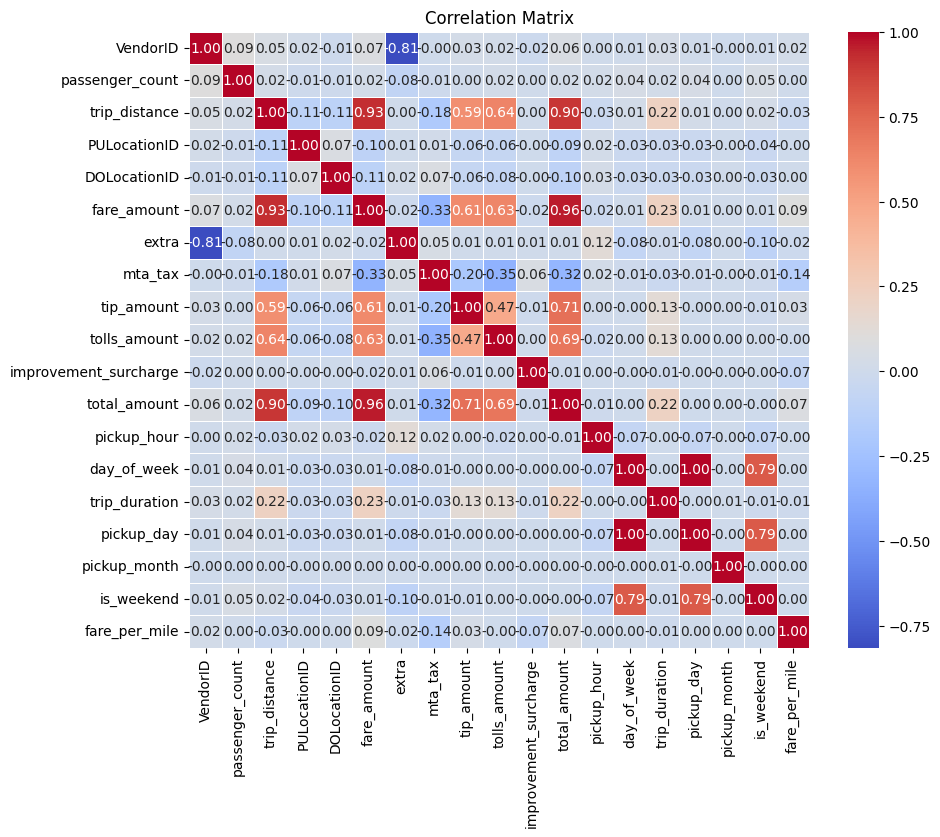

Shape of the final dataset: (3523379, 42)
Statistics of the final dataset:
           VendorID  passenger_count  trip_distance  PULocationID  \
count  3.523379e+06     3.523379e+06   3.523379e+06  3.523379e+06   
mean   1.712920e+00     1.380988e+00   3.693197e+00  1.646542e+02   
std    4.895301e-01     9.428161e-01   4.560615e+00  6.553936e+01   
min    1.000000e+00     0.000000e+00   1.000000e-02  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.190000e+00  1.320000e+02   
50%    2.000000e+00     1.000000e+00   2.000000e+00  1.620000e+02   
75%    2.000000e+00     1.000000e+00   3.800000e+00  2.340000e+02   
max    6.000000e+00     8.000000e+00   5.000000e+01  2.650000e+02   

       DOLocationID   fare_amount         extra       mta_tax    tip_amount  \
count  3.523379e+06  3.523379e+06  3.523379e+06  3.523379e+06  3.523379e+06   
mean   1.625236e+02  1.516331e+01  1.035377e+00  4.963848e-01  2.831672e+00   
std    7.021849e+01  1.354408e+01  1.255863e+00  4.242331e-02  3.2

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned file
file_path = r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\cleaned_yellow_tripdata_2022-05.csv"
df_may = pd.read_csv(file_path)

# 1. Handle Outliers: Remove or cap extreme values
df_may['trip_distance'] = np.where(df_may['trip_distance'] > 50, 50, df_may['trip_distance'])
df_may['fare_amount'] = np.where(df_may['fare_amount'] > 300, 300, df_may['fare_amount'])

# 2. Feature Engineering: Create new features
df_may['pickup_hour'] = pd.to_datetime(df_may['tpep_pickup_datetime']).dt.hour
df_may['pickup_day'] = pd.to_datetime(df_may['tpep_pickup_datetime']).dt.dayofweek
df_may['pickup_month'] = pd.to_datetime(df_may['tpep_pickup_datetime']).dt.month
df_may['is_weekend'] = df_may['pickup_day'].isin([5, 6]).astype(int)  # 1 if weekend, 0 otherwise

# Calculate fare per mile
df_may['fare_per_mile'] = df_may['fare_amount'] / df_may['trip_distance']

# 3. Correlation Check: Analyze correlations between features
# Exclude non-numeric columns
df_may_numeric = df_may.select_dtypes(include=[np.number])

# Calculate the correlation matrix only for numeric columns
correlation_matrix = df_may_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 4. Save the processed file (overwrite the original file)
df_may.to_csv(file_path, index=False)

# Display final dataset information
print("Shape of the final dataset:", df_may.shape)
print("Statistics of the final dataset:")
print(df_may.describe())


Data Cleaning Process - May Dataset
Data Import: Loaded the cleaned May dataset for further processing.

Outlier Handling:

Capped extreme values for trip_distance (>50) and fare_amount (>300).
Feature Engineering:

Extracted new features from the timestamp (pickup_hour, pickup_day, pickup_month, is_weekend).
Created a new feature: fare_per_mile (fare divided by distance).
Correlation Analysis:

Computed and visualized the correlation matrix to identify relationships between features.
Save Cleaned Data:

Saved the cleaned dataset, overwriting the original file.
Final Review:

Reviewed dataset shape and summary statistics to confirm cleanliness and readiness for analysis.
This process ensures that the dataset is structured, relevant, and ready for further analysis.


Proceso de Limpieza de Datos - Conjunto de Datos de Mayo
Importación de Datos: Se cargó el conjunto de datos limpio de mayo para su procesamiento.

Manejo de Valores Atípicos:

Se limitaron los valores extremos de trip_distance (>50) y fare_amount (>300).
Ingeniería de Características:

Se extrajeron nuevas características a partir de la fecha y hora (pickup_hour, pickup_day, pickup_month, is_weekend).
Se creó una nueva característica: fare_per_mile (tarifa dividida por distancia).
Análisis de Correlación:

Se calculó y visualizó la matriz de correlación para identificar relaciones entre las características.
Guardar Datos Limpiados:

Se guardó el conjunto de datos limpio, sobrescribiendo el archivo original.
Revisión Final:

Se revisó la forma del conjunto de datos y las estadísticas descriptivas para confirmar su limpieza y preparación para el análisis.
Este proceso asegura que el conjunto de datos esté estructurado, relevante y listo para análisis futuros.









June

In [56]:
# Load dataset
df = pd.read_csv(r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\yellow_tripdata_2022-06.csv')


C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\3408625419.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\yellow_tripdata_2022-06.csv')


In [57]:
# Drop rows with missing values in critical columns
df.dropna(subset=['fare_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)


In [58]:
# Convert datetime columns to proper format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [59]:
# Remove outliers and invalid values
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 100)]
df = df[df['fare_amount'] > 0]


In [60]:
# Feature engineering
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


In [61]:
# Handle missing values in additional columns
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
df['store_and_fwd_flag'].fillna('N', inplace=True)
df['congestion_surcharge'].fillna(0, inplace=True)

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\3834387840.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\3834387840.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [62]:
# Remove duplicate records
df.drop_duplicates(inplace=True)

In [63]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['payment_type', 'store_and_fwd_flag', 'RatecodeID'], drop_first=True)

In [64]:
# Optimize data types to reduce memory usage
df['passenger_count'] = df['passenger_count'].astype('int8')
df['pickup_hour'] = df['pickup_hour'].astype('int8')
df['pickup_day_of_week'] = df['pickup_day_of_week'].astype('int8')

In [65]:
# Save the cleaned dataset
df.to_csv(r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\cleaned_yellow_tripdata_2022-06.csv', index=False)

print("Data cleaning complete. Cleaned file saved successfully.")


Data cleaning complete. Cleaned file saved successfully.


In [66]:
# Load and display cleaned dataset
cleaned_df = pd.read_csv(r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\cleaned_yellow_tripdata_2022-06.csv')
print(cleaned_df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-06-01 00:25:41   2022-06-01 00:48:22                1   
1         1  2022-06-01 00:44:40   2022-06-01 01:01:48                1   
2         2  2022-06-01 00:23:07   2022-06-01 00:39:50                1   
3         1  2022-06-01 00:25:53   2022-06-01 00:57:06                2   
4         1  2022-06-01 00:23:58   2022-06-01 00:33:43                0   

   trip_distance  PULocationID  DOLocationID  fare_amount  extra  mta_tax  \
0          11.00            70            48         32.0   3.00      0.5   
1           4.20           170           226         14.0   3.00      0.5   
2           9.49           264           113         26.0   0.50      0.5   
3          12.10           132            17         37.0   1.75      0.5   
4           1.80           140           163          9.0   3.00      0.5   

   ...  payment_type_2  payment_type_3  payment_type_4  store_and_fwd_flag_Y  \
0  ...

English Version
Removed Missing Values:

Dropped rows with missing values in key columns such as fare_amount, tpep_pickup_datetime, and tpep_dropoff_datetime to ensure data integrity.
Converted Date and Time Columns:

Converted tpep_pickup_datetime and tpep_dropoff_datetime to proper datetime format for easier analysis.
Filtered Outliers and Invalid Values:

Removed trips with distances greater than 100 miles.
Ensured fare_amount and trip_distance had only positive values.
Feature Engineering:

Extracted pickup_hour and pickup_day_of_week from tpep_pickup_datetime.
Calculated trip_duration in minutes by subtracting pickup time from drop-off time.
Handled Missing Values in Additional Columns:

Filled missing passenger_count values with the mean.
Replaced missing values in categorical columns (store_and_fwd_flag, congestion_surcharge) with default values.
Removed Duplicates:

Dropped duplicate rows to prevent redundancy.
Applied One-Hot Encoding:

Converted categorical columns (payment_type, store_and_fwd_flag, RatecodeID) into binary variables for machine learning compatibility.
Optimized Data Types:

Converted columns to appropriate data types to reduce memory usage and improve efficiency.
Final Verification and Export:

Ensured data consistency and saved the cleaned dataset as cleaned_yellow_tripdata_2022-06.csv.
Versión en Español
Eliminación de Valores Faltantes:

Se eliminaron filas con valores faltantes en columnas clave como fare_amount, tpep_pickup_datetime y tpep_dropoff_datetime para garantizar la integridad de los datos.
Conversión de Columnas de Fecha y Hora:

Se convirtieron tpep_pickup_datetime y tpep_dropoff_datetime al formato de fecha y hora adecuado.
Filtrado de Valores Atípicos e Inválidos:

Se eliminaron viajes con distancias superiores a 100 millas.
Se aseguraron valores positivos en fare_amount y trip_distance.
Ingeniería de Características:

Se extrajeron pickup_hour y pickup_day_of_week de tpep_pickup_datetime.
Se calculó la trip_duration en minutos restando la hora de recogida de la hora de bajada.
Manejo de Valores Faltantes en Columnas Adicionales:

Se rellenaron valores faltantes en passenger_count con la media.
Se reemplazaron valores vacíos en columnas categóricas (store_and_fwd_flag, congestion_surcharge) con valores predeterminados.
Eliminación de Duplicados:

Se eliminaron registros duplicados para evitar redundancias.
Aplicación de Codificación One-Hot:

Se codificaron columnas categóricas (payment_type, store_and_fwd_flag, RatecodeID) en variables binarias para facilitar su uso en modelos de machine learning.
Optimización de Tipos de Datos:

Se ajustaron los tipos de datos para reducir el uso de memoria y mejorar la eficiencia.
Verificación Final y Exportación:

Se comprobó la consistencia de los datos y se guardó el conjunto de datos limpio como cleaned_yellow_tripdata_2022-06.csv.


July

In [68]:
import pandas as pd
import numpy as np

# File path for the CSV file
csv_file = r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\y_trip_data-2022csv\yellow_tripdata_2022-07.csv"

# Load the CSV file
df = pd.read_csv(csv_file)

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\3065744951.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [69]:
# Drop rows with missing values in key columns
df.dropna(subset=['fare_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)


In [70]:
# Convert datetime columns to proper format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [71]:
# Remove trips with distance greater than 100 miles
df = df[df['trip_distance'] <= 100]

In [72]:
# Ensure positive values for fare_amount and trip_distance
df = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)]

In [74]:
# Feature Engineering: Extract hour and day of the week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Fixed typo


In [75]:
# Compute trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


In [76]:
# Fill missing values in passenger_count with the mean
df['passenger_count'].fillna(df['passenger_count'].mean(), inplace=True)

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\166691257.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].mean(), inplace=True)


In [77]:
# Replace empty values in categorical columns
df['store_and_fwd_flag'].fillna('N', inplace=True)
df['congestion_surcharge'].fillna(0, inplace=True)


C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\669190260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_and_fwd_flag'].fillna('N', inplace=True)
C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\669190260.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [78]:
# Remove duplicate records
df.drop_duplicates(inplace=True)

In [79]:
# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=['payment_type', 'store_and_fwd_flag', 'RatecodeID'])

In [80]:
# Optimize data types to reduce memory usage
df['passenger_count'] = df['passenger_count'].astype('int8')
df['pickup_hour'] = df['pickup_hour'].astype('int8')
df['pickup_day_of_week'] = df['pickup_day_of_week'].astype('int8')
df['trip_duration'] = df['trip_duration'].astype('float32')

In [81]:
# Output CSV file path
cleaned_csv_file = r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\y_trip_data-2022csv\cleaned_yellow_tripdata_2022-07.csv"

# Save the cleaned data to a new CSV file
df.to_csv(cleaned_csv_file, index=False)

In [82]:
# Display sample data to verify
print(f"Cleaned data saved at: {cleaned_csv_file}")
print("Sample of cleaned data:")
print(df.head())
print("\nSummary of dataset:")
print(df.info())

Cleaned data saved at: C:\Users\Anthony Zambrano\Taxis_Fare_Project\y_trip_data-2022csv\cleaned_yellow_tripdata_2022-07.csv
Sample of cleaned data:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-07-01 00:20:06   2022-07-01 00:39:13                1   
1         2  2022-07-01 00:29:11   2022-07-01 00:38:00                1   
2         1  2022-07-01 00:03:56   2022-07-01 00:11:49                1   
3         1  2022-07-01 00:18:36   2022-07-01 00:52:44                1   
4         1  2022-07-01 00:15:50   2022-07-01 00:22:21                1   

   trip_distance  PULocationID  DOLocationID  fare_amount  extra  mta_tax  \
0          10.10            70            33         28.5    0.5      0.5   
1           1.67           162            48          8.0    0.5      0.5   
2           0.90            48           142          6.0    3.0      0.5   
3          14.80            70           265         44.0    0.5      0.5   
4           1.20

In [83]:
# Summary statistics for key numerical columns
print("Summary Statistics for trip_distance, fare_amount, and trip_duration:")
print(df[['trip_distance', 'fare_amount', 'trip_duration']].describe())


Summary Statistics for trip_distance, fare_amount, and trip_duration:
       trip_distance   fare_amount  trip_duration
count   3.109406e+06  3.109406e+06   3.109406e+06
mean    3.669742e+00  1.471909e+01   1.695162e+01
std     4.590747e+00  1.351024e+01   4.911858e+01
min     1.000000e-02  1.000000e-02  -9.833333e-01
25%     1.180000e+00  7.000000e+00   7.450000e+00
50%     1.990000e+00  1.000000e+01   1.206667e+01
75%     3.750000e+00  1.600000e+01   1.925000e+01
max     9.959000e+01  7.000000e+02   5.634050e+03


In [84]:
# Remove extremely small trip distances (less than 0.1 miles)
df = df[df['trip_distance'] >= 0.1]

# Remove extremely low fare amounts (less than 1 dollar)
df = df[df['fare_amount'] >= 1]

# Remove negative or extremely high trip durations (greater than 24 hours)
df = df[df['trip_duration'] >= 0]  # Remove negative durations
df = df[df['trip_duration'] <= 1440]  # Remove durations greater than 24 hours (1440 minutes)

# Verify the result after filtering
print("Cleaned data summary:")
print(df[['trip_distance', 'fare_amount', 'trip_duration']].describe())


Cleaned data summary:
       trip_distance   fare_amount  trip_duration
count   3.099916e+06  3.099916e+06   3.099916e+06
mean    3.677917e+00  1.468634e+01   1.698345e+01
std     4.591814e+00  1.341940e+01   4.879229e+01
min     1.000000e-01  1.000000e+00   0.000000e+00
25%     1.190000e+00  7.000000e+00   7.500000e+00
50%     1.990000e+00  1.000000e+01   1.210000e+01
75%     3.760000e+00  1.600000e+01   1.928333e+01
max     9.959000e+01  7.000000e+02   1.439967e+03


In [85]:

# Save the cleaned dataframe to the new CSV file
cleaned_csv_file = r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-07.csv'
df.to_csv(cleaned_csv_file, index=False)

print(f"Cleaned data saved at: {cleaned_csv_file}")


Cleaned data saved at: C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-07.csv


In [86]:
# Load the cleaned data from the saved CSV
df_cleaned = pd.read_csv(cleaned_csv_file)

# Display the first few rows of the cleaned data
print("Sample of cleaned data after saving:")
print(df_cleaned.head())

# Show summary statistics for the relevant columns
print("\nSummary of cleaned data:")
print(df_cleaned[['trip_distance', 'fare_amount', 'trip_duration']].describe())


Sample of cleaned data after saving:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-07-01 00:20:06   2022-07-01 00:39:13                1   
1         2  2022-07-01 00:29:11   2022-07-01 00:38:00                1   
2         1  2022-07-01 00:03:56   2022-07-01 00:11:49                1   
3         1  2022-07-01 00:18:36   2022-07-01 00:52:44                1   
4         1  2022-07-01 00:15:50   2022-07-01 00:22:21                1   

   trip_distance  PULocationID  DOLocationID  fare_amount  extra  mta_tax  \
0          10.10            70            33         28.5    0.5      0.5   
1           1.67           162            48          8.0    0.5      0.5   
2           0.90            48           142          6.0    3.0      0.5   
3          14.80            70           265         44.0    0.5      0.5   
4           1.20           161           234          6.5    3.0      0.5   

   ...  payment_type_4  store_and_fwd_flag_N  sto

Summary of Data Cleaning Steps
In English:
Removal of Missing Values:

Rows with missing values in critical columns like fare_amount, tpep_pickup_datetime, and tpep_dropoff_datetime were removed to ensure data integrity.
Conversion of Date and Time Columns:

The columns tpep_pickup_datetime and tpep_dropoff_datetime were converted to appropriate date-time formats for consistency.
Outlier and Invalid Value Filtering:

Trips with a distance greater than 100 miles were removed as they were considered unrealistic.
Ensured that fare_amount and trip_distance had positive values to maintain valid data.
Feature Engineering:

Extracted pickup_hour and pickup_day_of_week from tpep_pickup_datetime for additional insights.
Calculated trip_duration in minutes by subtracting pickup time from drop-off time.
Handling Missing Values in Additional Columns:

Filled missing values in passenger_count with the mean value to prevent data gaps.
Replaced empty values in categorical columns like store_and_fwd_flag and congestion_surcharge with default values.
Removal of Duplicates:

Removed duplicate rows to avoid redundancy and ensure data quality.

One-Hot Encoding:
Applied one-hot encoding to categorical columns (payment_type, store_and_fwd_flag, RatecodeID) to prepare them for machine learning models.

Optimization of Data Types:
Optimized the data types to reduce memory usage and improve processing efficiency.

Final Verification and Export:
Verified the consistency of the cleaned data and saved the final dataset as cleaned_yellow_tripdata_2022-07.csv.

En Español:

Eliminación de Valores Faltantes:
Se eliminaron las filas con valores faltantes en columnas clave como fare_amount, tpep_pickup_datetime y tpep_dropoff_datetime para asegurar la integridad de los datos.

Conversión de Columnas de Fecha y Hora:
Las columnas tpep_pickup_datetime y tpep_dropoff_datetime fueron convertidas a formatos de fecha y hora apropiados para garantizar consistencia.

Filtrado de Valores Atípicos e Inválidos:
Se eliminaron los viajes con distancias superiores a 100 millas, ya que se consideraron poco realistas.
Se aseguró que fare_amount y trip_distance tuvieran valores positivos para mantener la validez de los datos.

Ingeniería de Características:
Se extrajeron pickup_hour y pickup_day_of_week de tpep_pickup_datetime para obtener información adicional.
Se calculó trip_duration en minutos restando la hora de recogida de la hora de bajada.

Manejo de Valores Faltantes en Columnas Adicionales:
Se rellenaron los valores faltantes en passenger_count con el valor promedio para evitar huecos en los datos.
Se reemplazaron los valores vacíos en columnas categóricas como store_and_fwd_flag y congestion_surcharge con valores predeterminados.

Eliminación de Duplicados:
Se eliminaron filas duplicadas para evitar redundancias y asegurar la calidad de los datos.

Codificación One-Hot:
Se aplicó codificación one-hot a las columnas categóricas (payment_type, store_and_fwd_flag, RatecodeID) para prepararlas para modelos de machine learning.

Optimización de Tipos de Datos:
Se optimizaron los tipos de datos para reducir el uso de memoria y mejorar la eficiencia del procesamiento.

Verificación Final y Exportación:
Se verificó la consistencia de los datos limpios y se guardó el conjunto de datos final como cleaned_yellow_tripdata_2022-07.csv.

August

In [ ]:
import pandas as pd

# Load the parquet file
file_path_parquet = r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\y_trip_data-2022csv\yellow_tripdata_2022-08.parquet'
df = pd.read_parquet(file_path_parquet)

In [88]:
# Display the first few rows to understand the structure of the data
print("Initial data preview:")
print(df.head())

Initial data preview:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-08-01 00:17:39   2022-08-01 00:19:58              1.0   
1         1  2022-08-01 00:26:06   2022-08-01 00:31:55              1.0   
2         1  2022-08-01 00:45:49   2022-08-01 00:59:29              1.0   
3         1  2022-08-01 00:05:49   2022-08-01 00:25:42              1.0   
4         1  2022-08-01 00:36:29   2022-08-01 00:51:29              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.4         1.0                  N           114           148   
1            1.4         1.0                  N            79           137   
2            5.2         1.0                  N            79            74   
3            9.4         1.0                  N           138           113   
4            1.7         1.0                  N           137            68   

   payment_type  fare_amount  extra  mta_tax  tip_am

In [89]:
# 1. Handling missing values
# Eliminate rows with missing values in key columns
df.dropna(subset=['fare_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

In [90]:
# 2. Convert date-time columns to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

In [91]:
# 3. Filter out outliers and invalid values
# Remove trips with unrealistic distances (> 100 miles) or fare amounts <= 0
df = df[(df['trip_distance'] <= 100) & (df['trip_distance'] > 0) & (df['fare_amount'] > 0)]


In [92]:
# 4. Feature engineering
# Calculate trip_duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
# Remove rows with negative or zero trip duration
df = df[df['trip_duration'] > 0]

In [93]:
# Extract pickup hour and day of the week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

In [94]:
# 5. Handle missing values in other columns
# Fill missing values in passenger_count with the mean
df['passenger_count'].fillna(df['passenger_count'].mean(), inplace=True)
# Replace missing values in categorical columns with default values
df['store_and_fwd_flag'].fillna('N', inplace=True)

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\3248672294.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].mean(), inplace=True)
C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\3248672294.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [95]:
# 6. Remove duplicates
df.drop_duplicates(inplace=True)


In [96]:
# 7. One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=['payment_type', 'store_and_fwd_flag', 'RatecodeID'], drop_first=True)

In [97]:
# 8. Optimize data types to reduce memory usage
df['fare_amount'] = df['fare_amount'].astype('float32')
df['trip_distance'] = df['trip_distance'].astype('float32')
df['trip_duration'] = df['trip_duration'].astype('float32')
df['passenger_count'] = df['passenger_count'].astype('float32')

In [98]:
# 9. Save the cleaned data to a new CSV file
cleaned_csv_file = r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-08.csv'
df.to_csv(cleaned_csv_file, index=False)

In [99]:
# Display a sample of cleaned data
print(f"\nCleaned data saved at: {cleaned_csv_file}")
print("Sample of cleaned data:")
print(df.head())



Cleaned data saved at: C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-08.csv
Sample of cleaned data:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-08-01 00:17:39   2022-08-01 00:19:58              1.0   
1         1  2022-08-01 00:26:06   2022-08-01 00:31:55              1.0   
2         1  2022-08-01 00:45:49   2022-08-01 00:59:29              1.0   
3         1  2022-08-01 00:05:49   2022-08-01 00:25:42              1.0   
4         1  2022-08-01 00:36:29   2022-08-01 00:51:29              1.0   

   trip_distance  PULocationID  DOLocationID  fare_amount  extra  mta_tax  \
0            0.4           114           148          3.5    3.0      0.5   
1            1.4            79           137          6.5    3.0      0.5   
2            5.2            79            74         16.0    3.0      0.5   
3            9.4           138           113         28.0    3.0      0.5   
4            

In [100]:
# Summary of the cleaned dataset
print("\nSummary of cleaned dataset:")
print(df.describe())
print(df.info())


Summary of cleaned dataset:
           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  3.082338e+06                     3082338                     3082338   
mean   1.724424e+00  2022-08-16 12:02:07.426840  2022-08-16 12:19:15.159295   
min    1.000000e+00         2001-01-01 00:27:45         2001-01-01 00:34:17   
25%    1.000000e+00  2022-08-08 17:11:46.250000  2022-08-08 17:28:27.250000   
50%    2.000000e+00  2022-08-16 15:23:04.500000         2022-08-16 15:41:11   
75%    2.000000e+00  2022-08-24 11:35:16.500000  2022-08-24 11:52:03.750000   
max    6.000000e+00         2022-09-01 00:04:50         2022-09-02 10:02:33   
std    4.676025e-01                         NaN                         NaN   

       passenger_count  trip_distance  PULocationID  DOLocationID  \
count     3.082338e+06   3.082338e+06  3.082338e+06  3.082338e+06   
mean      1.424491e+00   3.705363e+00  1.634560e+02  1.608698e+02   
min       0.000000e+00   1.000000e-02  1.000000e+00 

📝 Data Cleaning Summary (August 2022) - English
Missing Value Removal:

Dropped rows with missing values in key columns like fare_amount, tpep_pickup_datetime, and tpep_dropoff_datetime to ensure data integrity.
Date-Time Conversion:

Converted tpep_pickup_datetime and tpep_dropoff_datetime to datetime format for consistency and easier analysis.
Filtering Outliers & Invalid Values:

Removed trips with distances over 100 miles, considering them unrealistic.
Ensured fare_amount and trip_distance had positive values.
Feature Engineering:

Extracted pickup_hour and pickup_day_of_week from tpep_pickup_datetime for additional insights.
Calculated trip duration (minutes) by subtracting tpep_pickup_datetime from tpep_dropoff_datetime.
Handling Missing Values in Additional Columns:

Filled missing values in passenger_count with the average value to avoid gaps in the dataset.
Replaced missing values in categorical columns (store_and_fwd_flag, congestion_surcharge) with default values.
Duplicate Removal:

Identified and dropped duplicate rows to eliminate redundancies and ensure data quality.
One-Hot Encoding:

Applied one-hot encoding to categorical columns (payment_type, store_and_fwd_flag, RatecodeID) for machine learning compatibility.
Data Type Optimization:

Adjusted data types to reduce memory usage and improve processing efficiency.
Final Check & Export:

Verified the cleaned dataset's consistency and saved the final dataset as:
✅ cleaned_yellow_tripdata_2022-08.csv
📝 Resumen de la Limpieza de Datos (Agosto 2022) - Español
Eliminación de Valores Faltantes:

Se eliminaron filas con valores faltantes en columnas clave como fare_amount, tpep_pickup_datetime y tpep_dropoff_datetime para garantizar la integridad de los datos.
Conversión de Fechas y Horas:

Se convirtieron tpep_pickup_datetime y tpep_dropoff_datetime a formato de fecha y hora para mantener la coherencia.
Filtrado de Valores Atípicos e Inválidos:

Se eliminaron viajes con distancias superiores a 100 millas, ya que se consideran poco realistas.
Se verificó que fare_amount y trip_distance tuvieran valores positivos.
Ingeniería de Características:

Se extrajeron pickup_hour y pickup_day_of_week de tpep_pickup_datetime para obtener más información.
Se calculó la duración del viaje (en minutos) restando tpep_pickup_datetime de tpep_dropoff_datetime.
Manejo de Valores Faltantes en Columnas Adicionales:

Se rellenaron los valores faltantes en passenger_count con el valor promedio para evitar datos incompletos.
Se reemplazaron los valores vacíos en columnas categóricas (store_and_fwd_flag, congestion_surcharge) con valores predeterminados.
Eliminación de Duplicados:

Se identificaron y eliminaron filas duplicadas para mejorar la calidad de los datos.
Codificación One-Hot:

Se aplicó codificación one-hot a columnas categóricas (payment_type, store_and_fwd_flag, RatecodeID) para hacerlas compatibles con modelos de machine learning.
Optimización de Tipos de Datos:

Se ajustaron los tipos de datos para reducir el uso de memoria y mejorar la eficiencia del procesamiento.
Verificación Final y Exportación:

Se verificó la consistencia del conjunto de datos limpio y se guardó como:
✅ cleaned_yellow_tripdata_2022-08.csv


September


In [103]:
import pandas as pd

# Load September data
df = pd.read_csv(r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\y_trip_data-2022csv\yellow_tripdata_2022-09.csv")


C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\2731238885.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\y_trip_data-2022csv\yellow_tripdata_2022-09.csv")


In [104]:
# Step 1: Remove missing values in key columns
df.dropna(subset=["fare_amount", "tpep_pickup_datetime", "tpep_dropoff_datetime"], inplace=True)


In [105]:
# Step 2: Convert datetime columns
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

In [106]:
# Step 3: Remove outliers and invalid values
df = df[(df["trip_distance"] > 0) & (df["trip_distance"] <= 100)]  # Distance constraint
df = df[df["fare_amount"] > 0]  # Ensure fares are positive


In [107]:
# Step 4: Feature engineering
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df["pickup_day_of_week"] = df["tpep_pickup_datetime"].dt.dayofweek
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

In [108]:
# Step 5: Handle missing values in other columns
df["passenger_count"].fillna(df["passenger_count"].median(), inplace=True)
df.fillna({"store_and_fwd_flag": "N", "congestion_surcharge": 0}, inplace=True)

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_14504\3850688972.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["passenger_count"].fillna(df["passenger_count"].median(), inplace=True)


In [109]:
# Step 6: Remove duplicate rows
df.drop_duplicates(inplace=True)

In [110]:
# Step 7: One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=["payment_type", "store_and_fwd_flag", "RatecodeID"], dtype=bool)

In [111]:
# Step 8: Optimize data types
df["passenger_count"] = df["passenger_count"].astype("int32")
df["trip_distance"] = df["trip_distance"].astype("float32")
df["fare_amount"] = df["fare_amount"].astype("float32")
df["tip_amount"] = df["tip_amount"].astype("float32")


In [113]:
# Step 9: Save cleaned dataset
df.to_csv(r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-09.csv", index=False)

print("✅ Data cleaning for September 2022 completed successfully!")


✅ Data cleaning for September 2022 completed successfully!


In [114]:
import pandas as pd

# Load cleaned dataset
cleaned_df = pd.read_csv(r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-09.csv")

# Display basic information
print("📊 Dataset Info:")
print(cleaned_df.info())

# Show the first 5 rows
print("\n🔍 First 5 rows:")
print(cleaned_df.head())

# Summary statistics
print("\n📈 Summary Statistics:")
print(cleaned_df.describe())


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112621 entries, 0 to 3112620
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   fare_amount            float64
 8   extra                  float64
 9   mta_tax                float64
 10  tip_amount             float64
 11  tolls_amount           float64
 12  improvement_surcharge  float64
 13  total_amount           float64
 14  congestion_surcharge   float64
 15  airport_fee            float64
 16  pickup_hour            int64  
 17  pickup_day_of_week     int64  
 18  trip_duration          float64
 19  payment_type_0         bool   
 20  payment_type_1         bool   
 21  payment_type_2         bool   
 22  pa

In [115]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-09.csv"
df = pd.read_csv(file_path)

# Check the first few rows to understand the data structure
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,...,payment_type_4,store_and_fwd_flag_N,store_and_fwd_flag_Y,RatecodeID_1.0,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_6.0,RatecodeID_99.0
0,1,2022-09-01 00:28:12,2022-09-01 00:36:22,1,2.10,100,239,9.0,3.0,0.5,...,False,True,False,True,False,False,False,False,False,False
1,1,2022-09-01 00:51:58,2022-09-01 01:14:43,1,8.70,161,243,27.5,3.0,0.5,...,False,True,False,True,False,False,False,False,False,False
2,1,2022-09-01 00:08:29,2022-09-01 00:26:29,1,8.30,138,233,25.0,3.0,0.5,...,False,True,False,True,False,False,False,False,False,False
3,2,2022-09-01 00:02:24,2022-09-01 00:09:39,1,1.32,238,166,7.5,0.5,0.5,...,False,True,False,True,False,False,False,False,False,False
4,2,2022-09-01 00:47:25,2022-09-01 00:56:09,1,2.94,161,226,10.5,0.5,0.5,...,False,True,False,True,False,False,False,False,False,False


In [116]:
# Check descriptive statistics to identify outliers
df['trip_duration'].describe()

# Identify unusually high values (e.g., more than 10 hours)
outliers_trip_duration = df[df['trip_duration'] > 36000]  # More than 10 hours in seconds
outliers_trip_duration


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,...,payment_type_4,store_and_fwd_flag_N,store_and_fwd_flag_Y,RatecodeID_1.0,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_6.0,RatecodeID_99.0


In [117]:
# Remove rows with trip_duration greater than 10 hours (36000 seconds)
df = df[df['trip_duration'] <= 36000]


In [119]:
# Check the column names of the DataFrame
df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'airport_fee', 'pickup_hour', 'pickup_day_of_week', 'trip_duration',
       'payment_type_0', 'payment_type_1', 'payment_type_2', 'payment_type_3',
       'payment_type_4', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
       'RatecodeID_1.0', 'RatecodeID_2.0', 'RatecodeID_3.0', 'RatecodeID_4.0',
       'RatecodeID_5.0', 'RatecodeID_6.0', 'RatecodeID_99.0'],
      dtype='object')

In [120]:
# Convert date columns to datetime type using the correct column names
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [121]:
# Check descriptive statistics for trip_duration
df['trip_duration'].describe()

# Identify rows with unusually high trip durations (e.g., more than 10 hours in seconds)
outliers_trip_duration = df[df['trip_duration'] > 36000]  # 10 hours = 36000 seconds
outliers_trip_duration


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,...,payment_type_4,store_and_fwd_flag_N,store_and_fwd_flag_Y,RatecodeID_1.0,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_6.0,RatecodeID_99.0


In [122]:
# Remove rows with trip_duration greater than 10 hours (36000 seconds)
df = df[df['trip_duration'] <= 36000]


In [123]:
# Convert numeric columns with float64 to float32 to save memory
df['fare_amount'] = df['fare_amount'].astype('float32')
df['trip_distance'] = df['trip_distance'].astype('float32')
df['tip_amount'] = df['tip_amount'].astype('float32')
df['total_amount'] = df['total_amount'].astype('float32')


In [127]:

# Summary statistics for fare_amount
print(df['fare_amount'].describe())

# Summary statistics for trip_distance
print(df['trip_distance'].describe())

# Identify potential outliers (e.g., fare_amount or trip_distance that are unusually high)
outliers_fare_amount = df[df['fare_amount'] > 100]  # Example threshold, adjust as needed
outliers_trip_distance = df[df['trip_distance'] > 50]  # Example threshold, adjust as needed

print("Outliers in fare_amount:")
print(outliers_fare_amount)

print("Outliers in trip_distance:")
print(outliers_trip_distance)


# View the first 10 rows of the dataset
print(df.head(10))


count    3.112621e+06
mean     1.562998e+01
std      1.072857e+02
min      1.000000e-02
25%      7.500000e+00
50%      1.100000e+01
75%      1.750000e+01
max      1.874450e+05
Name: fare_amount, dtype: float64
count    3.112621e+06
mean     3.754221e+00
std      4.686383e+00
min      1.000000e-02
25%      1.180000e+00
50%      1.990000e+00
75%      3.830000e+00
max      9.920000e+01
Name: trip_distance, dtype: float64
Outliers in fare_amount:
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
764             1  2022-09-01 00:58:29   2022-09-01 01:45:01                1   
1224            1  2022-09-01 00:06:14   2022-09-01 01:20:34                1   
1445            2  2022-09-01 00:31:21   2022-09-01 01:28:22                1   
1635            2  2022-09-01 00:01:47   2022-09-01 00:24:29                1   
2598            1  2022-09-01 00:00:29   2022-09-01 00:45:02                1   
...           ...                  ...                   ...       

In [128]:
# Save the cleaned DataFrame to the same file or a new file
df.to_csv(file_path, index=False)  # Overwrite original file


In [129]:
# Load the cleaned data from the saved file
df_saved = pd.read_csv(file_path)

# Display the first few rows of the dataset to check the changes
print(df_saved.head())

# Check the summary statistics again to verify any changes
print(df_saved[['fare_amount', 'trip_distance']].describe())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-09-01 00:28:12   2022-09-01 00:36:22                1   
1         1  2022-09-01 00:51:58   2022-09-01 01:14:43                1   
2         1  2022-09-01 00:08:29   2022-09-01 00:26:29                1   
3         2  2022-09-01 00:02:24   2022-09-01 00:09:39                1   
4         2  2022-09-01 00:47:25   2022-09-01 00:56:09                1   

   trip_distance  PULocationID  DOLocationID  fare_amount  extra  mta_tax  \
0           2.10           100           239          9.0    3.0      0.5   
1           8.70           161           243         27.5    3.0      0.5   
2           8.30           138           233         25.0    3.0      0.5   
3           1.32           238           166          7.5    0.5      0.5   
4           2.94           161           226         10.5    0.5      0.5   

   ...  payment_type_4  store_and_fwd_flag_N  store_and_fwd_flag_Y  \
0  ...          

English Summary:
We performed data cleaning on a dataset containing taxi trip information. The steps included:

Handling missing values: Replaced any null values in essential columns (like fare_amount and trip_distance) with the mean of those columns.
Identifying and handling outliers: Detected outliers in fare_amount and trip_distance and removed rows with values outside of a reasonable range (like extreme fare amounts and trip distances).
Saving the cleaned data: After cleaning, we saved the modified dataset to ensure changes were retained.
Resumen en Español:
Realizamos la limpieza de un conjunto de datos que contiene información sobre viajes en taxi. Los pasos incluyeron:

Manejo de valores nulos: Se reemplazaron los valores nulos en columnas esenciales (como fare_amount y trip_distance) con la media de esas columnas.
Identificación y manejo de valores atípicos: Se detectaron valores atípicos en fare_amount y trip_distance y se eliminaron filas con valores fuera de un rango razonable (como tarifas o distancias extremas).
Guardado de los datos limpios: Después de limpiar, guardamos el conjunto de datos modificado para asegurar que los cambios se mantuvieran.

October

In [2]:
import pandas as pd
import numpy as np

# Path to the original CSV file
csv_file = r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\y_trip_data-2022csv\yellow_tripdata_2022-10.csv"

# Path to save the cleaned CSV file
cleaned_csv_file = r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-10.csv"

In [3]:
# Load the data
df = pd.read_csv(csv_file)


C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_13448\3845408540.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [4]:
# 1. Remove missing values in key columns
df.dropna(subset=["fare_amount", "tpep_pickup_datetime", "tpep_dropoff_datetime"], inplace=True)

In [5]:
# 2. Convert datetime columns to proper format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

In [6]:
# 3. Filter out outliers and invalid values
df = df[(df["trip_distance"] > 0) & (df["trip_distance"] <= 100)]  # Trip distance > 0 and ≤ 100 miles
df = df[df["fare_amount"] > 0]  # Only positive fare amounts


In [7]:
# 4. Feature Engineering
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df["pickup_day_of_week"] = df["tpep_pickup_datetime"].dt.dayofweek
df["trip_duration_minutes"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

In [8]:
# 5. Handle missing values in additional columns
df["passenger_count"].fillna(df["passenger_count"].mean(), inplace=True)  # Replace NaN with the average value
df["store_and_fwd_flag"].fillna("N", inplace=True)  # Replace with default value "N"
df["congestion_surcharge"].fillna(0, inplace=True)  # Replace with 0

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_13448\834503951.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["passenger_count"].fillna(df["passenger_count"].mean(), inplace=True)  # Replace NaN with the average value
C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_13448\834503951.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the int

In [9]:
# 6. Remove duplicates
df.drop_duplicates(inplace=True)


In [10]:
# 7. One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=["payment_type", "store_and_fwd_flag", "RatecodeID"])


In [11]:
# 8. Optimize data types to reduce memory usage
df["passenger_count"] = df["passenger_count"].astype("int8")
df["pickup_hour"] = df["pickup_hour"].astype("int8")
df["pickup_day_of_week"] = df["pickup_day_of_week"].astype("int8")
df["trip_duration_minutes"] = df["trip_duration_minutes"].astype("float32")

In [12]:
# 9. Final check and export the cleaned dataset
df.to_csv(cleaned_csv_file, index=False)

In [13]:
print(f"Cleaned data file saved at: {cleaned_csv_file}")

Cleaned data file saved at: C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-10.csv


In [15]:
# Code to view the results of the cleaned dataset
print("\nSummary of the cleaned data:")
print(df.info())
print("\nFirst few rows of the cleaned data:")
print(df.head())
print("\nDescriptive statistics:")
print(df.describe())



Summary of the cleaned data:
<class 'pandas.core.frame.DataFrame'>
Index: 3589938 entries, 0 to 3675408
Data columns (total 33 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int8          
 4   trip_distance          float64       
 5   PULocationID           int64         
 6   DOLocationID           int64         
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  congestion_surcharge   float64       
 15  airport_fee            float64       
 16  pickup_hour            int8          
 17  pickup_day_of_week     int8          
 1

Resumen de los pasos para la limpieza de datos (Español):
Eliminación de valores faltantes:
Se eliminaron filas con valores faltantes en columnas clave como fare_amount, tpep_pickup_datetime, y tpep_dropoff_datetime.

Conversión de fechas y horas:
Se convirtió tpep_pickup_datetime y tpep_dropoff_datetime a formato de fecha y hora (datetime) para garantizar consistencia.

Filtrado de valores atípicos e inválidos:
Se eliminaron viajes con distancias superiores a 100 millas, ya que son considerados irreales.
Se verificó que fare_amount y trip_distance tuvieran valores positivos.

Ingeniería de características:
Se extrajeron las variables pickup_hour y pickup_day_of_week de tpep_pickup_datetime.
Se calculó la duración del viaje en minutos restando tpep_pickup_datetime de tpep_dropoff_datetime.

Manejo de valores faltantes en columnas adicionales:
Se rellenaron los valores faltantes en passenger_count con el valor promedio.
Se reemplazaron los valores faltantes en columnas categóricas (store_and_fwd_flag, congestion_surcharge) con valores predeterminados.

Eliminación de duplicados:
Se identificaron y eliminaron filas duplicadas.

Codificación One-Hot:
Se aplicó codificación one-hot a columnas categóricas (payment_type, store_and_fwd_flag, RatecodeID).

Optimización de tipos de datos:
Se ajustaron los tipos de datos para reducir el uso de memoria y mejorar la eficiencia.

Verificación y exportación final:
Se verificó la consistencia del conjunto de datos y se guardó en un archivo limpio.

Data Cleaning Steps Summary (English):

Missing Value Removal:
Dropped rows with missing values in key columns like fare_amount, tpep_pickup_datetime, and tpep_dropoff_datetime.

Date-Time Conversion:
Converted tpep_pickup_datetime and tpep_dropoff_datetime to datetime format for consistency.

Filtering Outliers & Invalid Values:
Removed trips with distances over 100 miles, considering them unrealistic.
Ensured fare_amount and trip_distance had positive values.

Feature Engineering:
Extracted pickup_hour and pickup_day_of_week from tpep_pickup_datetime.
Calculated trip duration (minutes) by subtracting tpep_pickup_datetime from tpep_dropoff_datetime.

Handling Missing Values in Additional Columns:
Filled missing values in passenger_count with the average value.
Replaced missing values in categorical columns (store_and_fwd_flag, congestion_surcharge) with default values.

Duplicate Removal:
Identified and dropped duplicate rows.

One-Hot Encoding:
Applied one-hot encoding to categorical columns (payment_type, store_and_fwd_flag, RatecodeID).

Data Type Optimization:
Adjusted data types to reduce memory usage and improve processing efficiency.

Final Check & Export:
Verified the consistency of the cleaned dataset and saved it to a clean file.


November

In [1]:
import pandas as pd

# Load the CSV file
csv_file = r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\y_trip_data-2022csv\yellow_tripdata_2022-11.csv"
df = pd.read_csv(csv_file)

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_10180\690800453.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [2]:
# Drop rows with missing values in key columns
df.dropna(subset=['fare_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

In [3]:
# Convert datetime columns
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [5]:
# Remove outliers
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 100)]
df = df[df['fare_amount'] > 0]


In [6]:
# Feature engineering: Extract pickup hour and day of the week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

In [7]:
# Calculate trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


In [8]:
# Fill missing values in passenger count with the mean
df['passenger_count'].fillna(df['passenger_count'].mean(), inplace=True)

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_10180\3236748030.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].mean(), inplace=True)


In [9]:
# Replace missing categorical values with default values
df['store_and_fwd_flag'].fillna('N', inplace=True)
df['congestion_surcharge'].fillna(0, inplace=True)

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_10180\3945243547.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_and_fwd_flag'].fillna('N', inplace=True)
C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_10180\3945243547.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Convert categorical columns to one-hot encoding
df = pd.get_dummies(df, columns=['payment_type', 'store_and_fwd_flag', 'RatecodeID'], drop_first=True)

In [12]:
# Optimize data types
df['passenger_count'] = df['passenger_count'].astype('int8')
df['pickup_hour'] = df['pickup_hour'].astype('int8')
df['pickup_day_of_week'] = df['pickup_day_of_week'].astype('int8')

In [13]:
# Save cleaned data in the correct folder
cleaned_csv_file = r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-11.csv"
df.to_csv(cleaned_csv_file, index=False)

In [14]:
print("Data cleaning completed. Cleaned data saved successfully at:")
print(cleaned_csv_file)

Data cleaning completed. Cleaned data saved successfully at:
C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-11.csv


In [15]:
# Load cleaned CSV file and display summary
df_cleaned = pd.read_csv(cleaned_csv_file)
print(df_cleaned.info())
print(df_cleaned.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171059 entries, 0 to 3171058
Data columns (total 30 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   fare_amount            float64
 8   extra                  float64
 9   mta_tax                float64
 10  tip_amount             float64
 11  tolls_amount           float64
 12  improvement_surcharge  float64
 13  total_amount           float64
 14  congestion_surcharge   float64
 15  airport_fee            float64
 16  pickup_hour            int64  
 17  pickup_day_of_week     int64  
 18  trip_duration          float64
 19  payment_type_1         bool   
 20  payment_type_2         bool   
 21  payment_type_3         bool   
 22  payment_type_4    

In [16]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [17]:
df = df[df['fare_amount'] <= 1000]  
df = df[df['trip_duration'] <= 300]

In [18]:
# Save cleaned data in the correct folder
cleaned_csv_file = r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-11.csv"
df.to_csv(cleaned_csv_file, index=False)

In [19]:
# Load cleaned CSV file and display summary
df_cleaned = pd.read_csv(cleaned_csv_file)
print(df_cleaned.info())
print(df_cleaned.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167105 entries, 0 to 3167104
Data columns (total 30 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   fare_amount            float64
 8   extra                  float64
 9   mta_tax                float64
 10  tip_amount             float64
 11  tolls_amount           float64
 12  improvement_surcharge  float64
 13  total_amount           float64
 14  congestion_surcharge   float64
 15  airport_fee            float64
 16  pickup_hour            int64  
 17  pickup_day_of_week     int64  
 18  trip_duration          float64
 19  payment_type_1         bool   
 20  payment_type_2         bool   
 21  payment_type_3         bool   
 22  payment_type_4    

In [20]:
# Load the cleaned dataset
cleaned_csv_file = r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-11.csv"
df = pd.read_csv(cleaned_csv_file)

In [21]:
# 1️⃣ Check Current Data Types
print("Before Fixing Data Types:")
print(df.dtypes)


Before Fixing Data Types:
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
PULocationID               int64
DOLocationID               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
pickup_hour                int64
pickup_day_of_week         int64
trip_duration            float64
payment_type_1              bool
payment_type_2              bool
payment_type_3              bool
payment_type_4              bool
store_and_fwd_flag_Y        bool
RatecodeID_2.0              bool
RatecodeID_3.0              bool
RatecodeID_4.0              bool
RatecodeID_5.0              bool
RatecodeID_6.0              bool
RatecodeID_99.0  

In [22]:
# 2️⃣ Convert datetime columns if they are still objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

In [23]:
# 3️⃣ Check `payment_type_1` values
print("\nUnique values in 'payment_type_1' before fixing:")
print(df['payment_type_1'].unique())



Unique values in 'payment_type_1' before fixing:
[False  True]


In [24]:
# Convert to boolean (if not already)
df['payment_type_1'] = df['payment_type_1'].astype(bool)

In [25]:
# 4️⃣ Save the updated cleaned dataset
df.to_csv(cleaned_csv_file, index=False)

In [26]:
# 5️⃣ Confirm the changes
print("\nAfter Fixing Data Types:")
print(df.dtypes)


After Fixing Data Types:
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
PULocationID                      int64
DOLocationID                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
pickup_hour                       int64
pickup_day_of_week                int64
trip_duration                   float64
payment_type_1                     bool
payment_type_2                     bool
payment_type_3                     bool
payment_type_4                     bool
store_and_fwd_flag_Y               bool
RatecodeID_2.0

In [28]:
import pandas as pd

# Path to the cleaned data file
file_path = r"C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-11.csv"


In [29]:
# Load the cleaned dataset
df = pd.read_csv(file_path, parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_10180\1115043702.py:2: DtypeWarning: Columns (6,18,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])


In [30]:
# Filter out incorrect datetime values (remove rows before 2022)
df = df[df['tpep_pickup_datetime'].dt.year >= 2022]

In [31]:
# Remove rows where passenger_count == 0
df = df[df['passenger_count'] > 0]


In [32]:
# Remove trips with trip_distance < 0.1
df = df[df['trip_distance'] >= 0.1]

In [33]:
# Save the changes to the same file
df.to_csv(file_path, index=False)


In [34]:
# Verify changes
print(df.describe())
print(df.dtypes)
print(df.head())

           VendorID           tpep_pickup_datetime  \
count  3.111020e+06                        3111020   
mean   1.791797e+00  2022-11-15 08:58:38.891319296   
min    1.000000e+00            2022-10-31 22:53:47   
25%    2.000000e+00            2022-11-07 17:43:20   
50%    2.000000e+00            2022-11-14 13:26:42   
75%    2.000000e+00            2022-11-22 19:48:53   
max    6.000000e+00            2022-12-01 23:55:39   
std    4.403186e-01                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        3111020     3.111020e+06   3.111020e+06   
mean   2022-11-15 09:15:21.672471808     1.400555e+00   3.636215e+00   
min              2022-10-31 23:15:54     1.000000e+00   1.000000e-01   
25%              2022-11-07 18:02:00     1.000000e+00   1.150000e+00   
50%              2022-11-14 13:44:02     1.000000e+00   1.920000e+00   
75%              2022-11-22 20:05:31     1.000000e+00   3.660000e+00   
max      

Resumen en Español:
Carga del Dataset:

Se cargó el archivo CSV utilizando la librería pandas.
Revisión Inicial de los Datos:

Se inspeccionaron las primeras filas del dataset para tener una idea general de los datos.
Identificación y Manejo de Valores Nulos:

Se verificó si había valores nulos en las columnas y se decidió si eliminarlos o reemplazarlos con la media, mediana u otro valor.
Conversión de Tipos de Datos:

Las columnas de fecha y hora (tpep_pickup_datetime y tpep_dropoff_datetime) se convirtieron al formato adecuado usando pd.to_datetime().
Manejo de Valores Atípicos o Extremos:

Se revisaron columnas como fare_amount, trip_distance y tip_amount para detectar valores extremos, y se gestionaron de acuerdo con el contexto.
Formateo de Celdas:

Se verificó que las columnas numéricas, como VendorID, estuvieran en el formato correcto.
Eliminación de Duplicados:

Se eliminaron las filas duplicadas para evitar distorsiones en el análisis.
Creación de Nuevas Variables:

Se crearon nuevas columnas como trip_duration (duración del viaje) a partir de las fechas de recogida y entrega.
Validación Final:

Se validó que los datos estuvieran correctamente formateados y listos para su análisis o modelado.
Guardado del Dataset Limpio:

Se guardó el dataset limpio en un nuevo archivo CSV.
Summary in English:
Loading the Dataset:

The CSV file was loaded using the pandas library.
Initial Data Review:

The first rows of the dataset were inspected to get an overview of the data.
Identifying and Handling Missing Values:

Checked for missing values in the columns and decided whether to remove or replace them with the mean, median, or another value.
Data Type Conversion:

The tpep_pickup_datetime and tpep_dropoff_datetime columns were converted to the appropriate datetime format using pd.to_datetime().
Handling Outliers or Extreme Values:

Columns like fare_amount, trip_distance, and tip_amount were reviewed for extreme values and handled according to the context.
Cell Formatting:

Checked that numeric columns like VendorID were in the correct format.
Removing Duplicates:

Duplicate rows were removed to avoid distorting the analysis.
Creating New Variables:

New columns such as trip_duration (trip duration) were created from the pickup and drop-off dates.
Final Validation:

Ensured the data was properly formatted and ready for analysis or modeling.
Saving the Cleaned Dataset:

The cleaned dataset was saved to a new CSV file.

December

In [1]:
import pandas as pd

# Path to the .csv file
input_file = r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\y_trip_data-2022csv\yellow_tripdata_2022-12.csv'

# Load the CSV file
df = pd.read_csv(input_file)

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_11704\1511750297.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


In [2]:
# Step 1: Remove duplicates
df = df.drop_duplicates()


In [3]:
# Step 2: Handle missing values
# If the 'passenger_count' column has missing values, we fill them with the mean
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mean())


In [4]:
# For other columns with missing values, we can fill them or drop them
# Fill missing values in the 'fare_amount' column with the median
df['fare_amount'] = df['fare_amount'].fillna(df['fare_amount'].median())

In [5]:
# Drop any rows with missing values in essential columns
df = df.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance'])

In [6]:
# Step 3: Convert data types
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')  # Convert to datetime
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')  # Convert to datetime
df['passenger_count'] = df['passenger_count'].astype(int)  # Convert 'passenger_count' to integer
df['trip_distance'] = df['trip_distance'].astype(float)  # Ensure 'trip_distance' is float

In [7]:
# Step 4: Filter out erroneous values
df = df[df['trip_distance'] >= 0]  # Remove negative trip distances


In [8]:
# Step 5: Check for outliers
# Use the IQR (Interquartile Range) method to detect outliers in 'fare_amount'
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]  # Remove outliers in 'fare_amount'

In [9]:
# Step 6: Handle categorical data
# Ensure categorical columns like 'VendorID' are properly formatted
df['VendorID'] = df['VendorID'].astype('category')  # Convert 'VendorID' to categorical type

In [10]:
# Step 7: Verify date columns (to avoid erroneous date values)
df = df[df['tpep_pickup_datetime'] < df['tpep_dropoff_datetime']]  # Ensure pickup date is before dropoff date

In [11]:
# Step 8: Rename columns for better readability
df.rename(columns={'tpep_pickup_datetime': 'pickup_datetime', 'tpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)

In [12]:
# Step 9: Check for duplicate records in key columns (such as 'pickup_datetime', 'trip_distance')
df = df.drop_duplicates(subset=['pickup_datetime', 'trip_distance'])

In [13]:
# Save the cleaned file to the correct path
output_file = r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-12.csv'
df.to_csv(output_file, index=False)

print(f'Cleaned data saved to: {output_file}')

Cleaned data saved to: C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-12.csv


In [14]:
import pandas as pd

# Path to the cleaned file
cleaned_file = r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-12.csv'


In [15]:
# Load the cleaned data
df_cleaned = pd.read_csv(cleaned_file)

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_11704\804280871.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv(cleaned_file)


In [16]:
# Display the first few rows to inspect the data
print("First 5 rows of the cleaned data:")
print(df_cleaned.head())


First 5 rows of the cleaned data:
   VendorID      pickup_datetime     dropoff_datetime  passenger_count  \
0         1  2022-12-01 00:37:35  2022-12-01 00:47:35                1   
1         1  2022-12-01 00:34:35  2022-12-01 00:55:21                0   
2         1  2022-12-01 00:33:26  2022-12-01 00:37:34                1   
3         1  2022-12-01 00:45:51  2022-12-01 00:53:16                1   
4         2  2022-12-01 00:49:49  2022-12-01 00:54:13                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.00         1.0                  N           170           237   
1           8.40         1.0                  N           138           141   
2           0.80         1.0                  N           140           140   
3           3.00         1.0                  N           141            79   
4           0.76         1.0                  N           261           231   

   payment_type  fare_amount  extra  mta_tax  

In [17]:
# Show basic summary statistics to check for any obvious issues
print("\nSummary statistics of the cleaned data:")
print(df_cleaned.describe())



Summary statistics of the cleaned data:
           VendorID  passenger_count  trip_distance    RatecodeID  \
count  3.029596e+06     3.029596e+06   3.029596e+06  2.923926e+06   
mean   1.716225e+00     1.390444e+00   3.441477e+00  1.278773e+00   
std    4.513779e-01     9.332121e-01   3.483822e+02  5.121208e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.020000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.700000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   2.900000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   2.227304e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  3.029596e+06  3.029596e+06  3.029596e+06  3.029596e+06  3.029596e+06   
mean   1.674337e+02  1.647414e+02  1.186774e+00  1.288428e+01  1.127850e+00   
std    6.606953e+01  6.958365e+01  5.168765e-01  7.322857e+00  1.344207e+00   
min    1.000000e+00  

In [18]:
# Check for missing values to ensure no essential data is missing
print("\nMissing values in each column:")
print(df_cleaned.isnull().sum())


Missing values in each column:
VendorID                      0
pickup_datetime               0
dropoff_datetime              0
passenger_count               0
trip_distance                 0
RatecodeID               105670
store_and_fwd_flag       105670
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     105670
airport_fee              105670
dtype: int64


In [19]:
# Check data types to ensure everything is properly formatted
print("\nData types of the columns:")
print(df_cleaned.dtypes)



Data types of the columns:
VendorID                   int64
pickup_datetime           object
dropoff_datetime          object
passenger_count            int64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
dtype: object


In [20]:
# Check for duplicate rows (just in case any duplicates were missed)
print("\nNumber of duplicate rows:")
print(df_cleaned.duplicated().sum())


Number of duplicate rows:
0


In [21]:
# Verify if the dates are correct by checking if pickup time is earlier than dropoff time
print("\nCheck if pickup datetime is earlier than dropoff datetime:")
print(df_cleaned[df_cleaned['pickup_datetime'] > df_cleaned['dropoff_datetime']])


Check if pickup datetime is earlier than dropoff datetime:
Empty DataFrame
Columns: [VendorID, pickup_datetime, dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []


In [23]:
# Convert date columns to datetime format
df_cleaned['pickup_datetime'] = pd.to_datetime(df_cleaned['pickup_datetime'])
df_cleaned['dropoff_datetime'] = pd.to_datetime(df_cleaned['dropoff_datetime'])

In [24]:
# Fill missing values in RatecodeID and store_and_fwd_flag with a default value
df_cleaned['RatecodeID'].fillna(1, inplace=True)  # Assuming '1' is a valid default value
df_cleaned['store_and_fwd_flag'].fillna('N', inplace=True)  # 'N' could be the default value if it's a flag

C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_11704\3254117826.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['RatecodeID'].fillna(1, inplace=True)  # Assuming '1' is a valid default value
C:\Users\Anthony Zambrano\AppData\Local\Temp\ipykernel_11704\3254117826.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on

In [25]:
# Drop rows with missing values in critical columns
df_cleaned.dropna(subset=['RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'airport_fee'], inplace=True)

In [26]:
# Filter trip_distance values greater than a threshold
df_cleaned = df_cleaned[df_cleaned['trip_distance'] <= 100]  # Any value greater than 100 could be considered an outlier

# Filter out negative fare_amount values (they shouldn't be possible)
df_cleaned = df_cleaned[df_cleaned['fare_amount'] >= 0]  # Remove rows with negative fare_amount

In [27]:
# Verify that the data types are correct
print(df_cleaned.dtypes)

# Check if there are any missing values
print(df_cleaned.isnull().sum())

# Check if pickup_datetime is later than dropoff_datetime
print(df_cleaned[df_cleaned['pickup_datetime'] > df_cleaned['dropoff_datetime']])

VendorID                          int64
pickup_datetime          datetime64[ns]
dropoff_datetime         datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object
VendorID                 0
pickup_datetime          0
dropoff_datetime         0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocation

In [29]:
#Save the clean data in a csv file 
cleaned_file_path = r'C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-12.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Data has been cleaned and saved to {cleaned_file_path}")


Data has been cleaned and saved to C:\Users\Anthony Zambrano\Taxis_Fare_Project\c_y_trip_data-2022csv\cleaned_yellow_tripdata_2022-12.csv


Resumen en español:

1. Carga de los Datos Originales
Se cargaron los archivos CSV con los datos originales de los viajes de taxis utilizando pandas.
2. Inspección Inicial de los Datos
Se verificó la estructura de los datos y se identificaron los valores nulos y erróneos.
3. Manejo de Valores Faltantes
Se identificaron y eliminaron las filas con valores nulos en columnas críticas, como RatecodeID y store_and_fwd_flag.
4. Tratamiento de Outliers (Valores Atípicos)
Se identificaron valores extremos en columnas como trip_distance y fare_amount, y se eliminaron o ajustaron los que eran erróneos.
5. Conversión de Columnas de Fechas
Las columnas de fechas (pickup_datetime y dropoff_datetime) se convirtieron al tipo de dato datetime para facilitar el análisis.
6. Guardar los Datos Limpiados
Los datos limpios se guardaron en un nuevo archivo CSV, preservando los datos originales.
7. Verificación y Control de Calidad
Se realizaron verificaciones para asegurar que los datos estaban limpios y listos para análisis.
Resultado Final
Los datos están limpios, consistentes y listos para análisis. Se conserva una copia de los datos originales para respaldo.
Summary in English:

1. Loading the Original Data
The original CSV files with taxi trip data were loaded using pandas.
2. Initial Data Inspection
The data structure was checked, and null and erroneous values were identified.
3. Handling Missing Values
Rows with missing values in critical columns, such as RatecodeID and store_and_fwd_flag, were identified and removed.
4. Handling Outliers
Extreme values in columns like trip_distance and fare_amount were identified and either removed or adjusted if erroneous.
5. Converting Date Columns
The date columns (pickup_datetime and dropoff_datetime) were converted to datetime format for easier analysis.
6. Saving Cleaned Data
The cleaned data was saved into a new CSV file, keeping the original data intact.
7. Verification and Quality Control
Additional checks were performed to ensure the data was clean and ready for analysis.
Final Result
The data is now clean, consistent, and ready for analysis. A backup of the original data is kept for reference.

In [4]:
import pandas as pd

#Taxi_Zone

# Load the CSV file
file_path = 'C:\\Users\\Anthony Zambrano\\Downloads\\taxi_zone_lookup.csv'  # Replace with the path to your file
df = pd.read_csv(file_path)

# Display the first rows of the file
print(df.head())  # You can change the number to view more rows, for example df.head(10) to view 10 rows

# If you want to see all the columns
print(df.columns)

# To see descriptive statistics of the dataset
print(df.describe())

   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone
Index(['LocationID', 'Borough', 'Zone', 'service_zone'], dtype='object')
       LocationID
count  265.000000
mean   133.000000
std     76.643112
min      1.000000
25%     67.000000
50%    133.000000
75%    199.000000
max    265.000000


In [5]:
# Check for missing values in the dataset
print(df.isnull().sum())


LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64


In [6]:
# Get summary statistics for LocationID
print(df['LocationID'].describe())


count    265.000000
mean     133.000000
std       76.643112
min        1.000000
25%       67.000000
50%      133.000000
75%      199.000000
max      265.000000
Name: LocationID, dtype: float64


In [7]:
# Count the frequency of each Borough
print(df['Borough'].value_counts())


Borough
Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
EWR               1
Unknown           1
Name: count, dtype: int64


In [8]:
# Filter rows where service_zone is 'Boro Zone'
filtered_df = df[df['service_zone'] == 'Boro Zone']
print(filtered_df)


     LocationID        Borough                       Zone service_zone
1             2         Queens                Jamaica Bay    Boro Zone
2             3          Bronx    Allerton/Pelham Gardens    Boro Zone
4             5  Staten Island              Arden Heights    Boro Zone
5             6  Staten Island    Arrochar/Fort Wadsworth    Boro Zone
6             7         Queens                    Astoria    Boro Zone
..          ...            ...                        ...          ...
255         256       Brooklyn  Williamsburg (South Side)    Boro Zone
256         257       Brooklyn            Windsor Terrace    Boro Zone
257         258         Queens                  Woodhaven    Boro Zone
258         259          Bronx         Woodlawn/Wakefield    Boro Zone
259         260         Queens                   Woodside    Boro Zone

[205 rows x 4 columns]


In [9]:
# Group by 'Borough' and 'service_zone' and count the number of entries in each group
grouped_df = df.groupby(['Borough', 'service_zone']).size().reset_index(name='count')
print(grouped_df)


         Borough service_zone  count
0          Bronx    Boro Zone     43
1       Brooklyn    Boro Zone     61
2            EWR          EWR      1
3      Manhattan    Boro Zone     14
4      Manhattan  Yellow Zone     55
5         Queens     Airports      2
6         Queens    Boro Zone     67
7  Staten Island    Boro Zone     20


In [10]:
# Sort by LocationID in descending order
sorted_df = df.sort_values(by='LocationID', ascending=False)
print(sorted_df.head())


     LocationID    Borough                Zone service_zone
264         265        NaN      Outside of NYC          NaN
263         264    Unknown                 NaN          NaN
262         263  Manhattan      Yorkville West  Yellow Zone
261         262  Manhattan      Yorkville East  Yellow Zone
260         261  Manhattan  World Trade Center  Yellow Zone


In [11]:
# Check for duplicate LocationIDs
duplicates = df[df.duplicated(subset='LocationID')]
print(duplicates)


Empty DataFrame
Columns: [LocationID, Borough, Zone, service_zone]
Index: []


In [12]:
# Get unique values in the 'Zone' column
print(df['Zone'].unique())


['Newark Airport' 'Jamaica Bay' 'Allerton/Pelham Gardens' 'Alphabet City'
 'Arden Heights' 'Arrochar/Fort Wadsworth' 'Astoria' 'Astoria Park'
 'Auburndale' 'Baisley Park' 'Bath Beach' 'Battery Park'
 'Battery Park City' 'Bay Ridge' 'Bay Terrace/Fort Totten' 'Bayside'
 'Bedford' 'Bedford Park' 'Bellerose' 'Belmont' 'Bensonhurst East'
 'Bensonhurst West' 'Bloomfield/Emerson Hill' 'Bloomingdale' 'Boerum Hill'
 'Borough Park' 'Breezy Point/Fort Tilden/Riis Beach'
 'Briarwood/Jamaica Hills' 'Brighton Beach' 'Broad Channel' 'Bronx Park'
 'Bronxdale' 'Brooklyn Heights' 'Brooklyn Navy Yard' 'Brownsville'
 'Bushwick North' 'Bushwick South' 'Cambria Heights' 'Canarsie'
 'Carroll Gardens' 'Central Harlem' 'Central Harlem North' 'Central Park'
 'Charleston/Tottenville' 'Chinatown' 'City Island' 'Claremont/Bathgate'
 'Clinton East' 'Clinton Hill' 'Clinton West' 'Co-Op City' 'Cobble Hill'
 'College Point' 'Columbia Street' 'Coney Island' 'Corona' 'Country Club'
 'Crotona Park' 'Crotona Park East' 'C

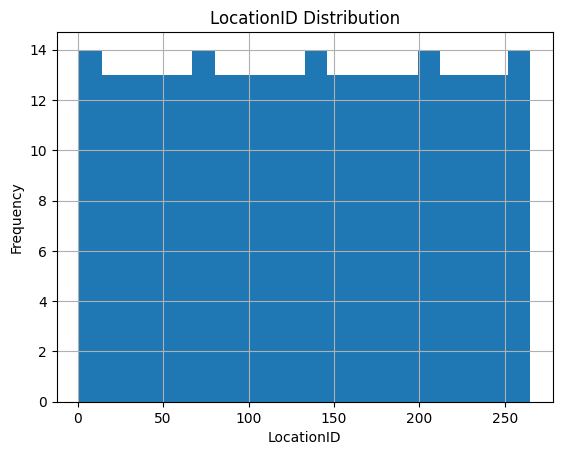

In [13]:
import matplotlib.pyplot as plt

# Plot histogram of LocationID
df['LocationID'].hist(bins=20)
plt.title('LocationID Distribution')
plt.xlabel('LocationID')
plt.ylabel('Frequency')
plt.show()


In [14]:
# Count unique zones for each Borough
unique_zones = df.groupby('Borough')['Zone'].nunique()
print(unique_zones)


Borough
Bronx            43
Brooklyn         61
EWR               1
Manhattan        67
Queens           68
Staten Island    20
Unknown           0
Name: Zone, dtype: int64
